# Predikcija statusa telesne tezine na osnovu etnickih i demografskih faktora

Cilj ovog projekta je predviđanje statusa telesne težine na osnovu različitih demografskih i socioekonomskih faktora. Koristeći dostupne podatke, istraživači će moći da identifikuju ključne faktore koje uticu na gojaznost.

	Prikupljanje i Analiza Podataka:

•	Učitavanje i istraživanje skupa podataka o studentima.

•	Vizualizacija raspodela, demografskih podataka i drugih relevantnih informacija.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('HealthBMI.csv')
print(data.isna().sum(axis=0))

data = data[["Year", "Locationdesc", "Response", "Break_Out", 'Break_Out_Category', 'Sample_Size']]

# Prikazivanje prvih nekoliko redova podataka radi provere
print(data.head(10))
print(data.columns)
print(data.shape)

print(data.dtypes)


Year                              0
Locationabbr                      0
Locationdesc                      0
Class                             0
Topic                             0
Question                          0
Response                          0
Break_Out                         0
Break_Out_Category                0
Sample_Size                       0
Data_value                    13088
Confidence_limit_Low          13184
Confidence_limit_High         13184
Display_order                    16
Data_value_unit                   0
Data_value_type                   0
Data_Value_Footnote_Symbol    51490
Data_Value_Footnote           51490
DataSource                        0
ClassId                           0
TopicId                           0
LocationID                        0
BreakoutID                        0
BreakOutCategoryID                0
QuestionID                        0
ResponseID                        0
GeoLocation                      96
dtype: int64
   Year Locatio

In [8]:
# Prikazivanje unique vrednosti u koloni "Break_Out_Category"
print(data['Break_Out_Category'].unique())

# Razdvajanje kolone "Break_Out_Category" na 6 novih kolona
#data = pd.get_dummies(data, columns=['Break_Out_Category'])

data_age = data[data['Break_Out_Category'] == 'Age Group']
data_race = data[data['Break_Out_Category'] == 'Race/Ethnicity']
data_education = data[data['Break_Out_Category'] == 'Education Attained']
data_income = data[data['Break_Out_Category'] == 'Household Income']
data_gender = data[data['Break_Out_Category'] == 'Gender']
data_all = data[data['Break_Out_Category'] == 'Overall']

def display_data_info(data, name):
    print(f"Dataset: {name}")
    print(data.head(5))
    print(data.columns)
   

# Prikazivanje informacija za svaki data set
display_data_info(data_age, "Age Groups")
display_data_info(data_race, "Race/Ethnicity")
display_data_info(data_education, "Education Attained")
display_data_info(data_income, "Household Income")
display_data_info(data_gender, "Gender")
display_data_info(data_all, "Overall")

['Age Group' 'Race/Ethnicity' 'Education Attained' 'Household Income'
 'Gender' 'Overall']
Dataset: Age Groups
    Year Locationdesc                     Response Break_Out  \
0   2020       Alaska  Underweight (BMI 12.0-18.4)     45-54   
1   2019      Alabama  Underweight (BMI 12.0-18.4)     35-44   
9   2019       Alaska  Underweight (BMI 12.0-18.4)     35-44   
10  2019      Arizona  Underweight (BMI 12.0-18.4)     18-24   
11  2019       Alaska  Underweight (BMI 12.0-18.4)     45-54   

   Break_Out_Category  Sample_Size  
0           Age Group            5  
1           Age Group            7  
9           Age Group            1  
10          Age Group           23  
11          Age Group            4  
Index(['Year', 'Locationdesc', 'Response', 'Break_Out', 'Break_Out_Category',
       'Sample_Size'],
      dtype='object')
Dataset: Race/Ethnicity
   Year Locationdesc                       Response  \
2  2019      Alabama    Underweight (BMI 12.0-18.4)   
3  2019      Alabama    U

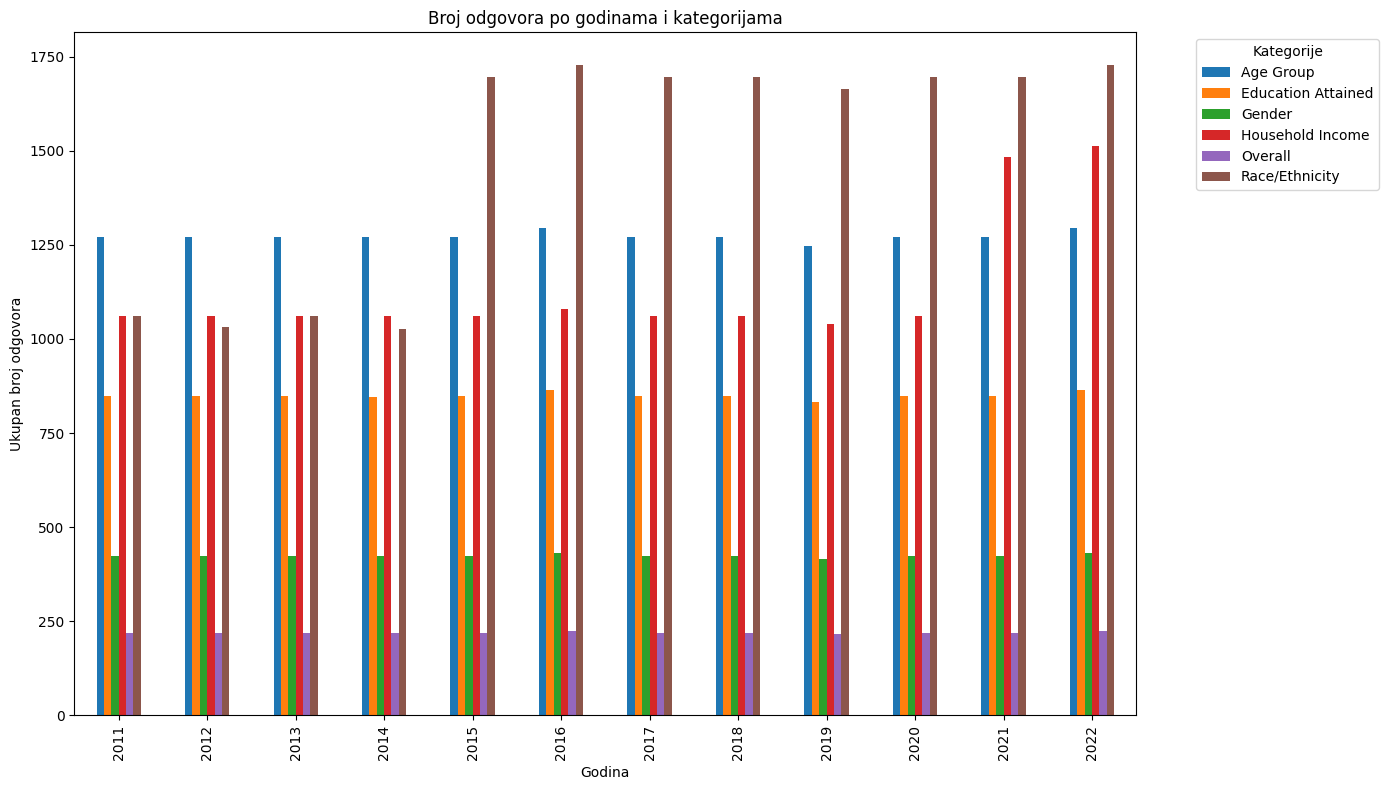

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Učitavanje podataka
data = pd.read_csv('HealthBMI.csv')

data_graph = data[["Year", "Break_Out_Category", "Response"]]

# Grupisanje podataka po godinama i kategorijama i brojanje pojavljivanja Odgovor vrednosti
grouped_data = data_graph.groupby(['Year', 'Break_Out_Category']).size().unstack()

# Kreiranje bar chart-a
grouped_data.plot(kind='bar', figsize=(14, 8))

# Dodavanje naslova i labela
plt.title('Broj odgovora po godinama i kategorijama')
plt.xlabel('Godina')
plt.ylabel('Ukupan broj odgovora')
plt.legend(title='Kategorije', bbox_to_anchor=(1.05, 1), loc='upper left')

# Prikazivanje grafa
plt.tight_layout()
plt.show()


	Priprema Podataka i modeliranje:

•	Obrada nedostajućih vrednosti.

•	Kodiranje kategoričkih podataka.

•	Normalizacija numeričkih podataka.

•	Podela skupa podataka na trening, validacioni i test set.(70% za trening, 15% za validaciju i 15% za testiranje.)

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.impute import SimpleImputer

# Assuming 'Sample_Size' is the target variable and the rest are features
features = ["Year", "Locationdesc", "Response", "Break_Out", 'Break_Out_Category']
target = 'Sample_Size'

# Split the data into training, validation, and testing sets
train_data, temp_data = train_test_split(data, test_size=0.3, random_state=42)
test_data, val_data = train_test_split(temp_data, test_size=0.5, random_state=42)

print("Training set size:", len(train_data))
print("Testing set size:", len(test_data))
print("Validation set size:", len(val_data))

# Separate features and target
X_train = train_data[features]
y_train = train_data[target]
X_test = test_data[features]
y_test = test_data[target]

# Identify numeric and categorical features
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

# Define preprocessing pipelines
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create and fit the preprocessing model
model = Pipeline(steps=[('preprocessor', preprocessor)])

# Preprocess the training data
X_train_preprocessed = model.fit_transform(X_train)

# Preprocess the test data
X_test_preprocessed = model.transform(X_test)

# Optional: Print shapes of preprocessed data
print("Shape of preprocessed training data:", X_train_preprocessed.shape)
print("Shape of preprocessed testing data:", X_test_preprocessed.shape)


Training set size: 45215
Testing set size: 9689
Validation set size: 9690
Shape of preprocessed training data: (45215, 100)
Shape of preprocessed testing data: (9689, 100)


•	Implementacija multivarijabilne regresije na fizicku aktivnost sa L1 normom (lasso), L2 normom (ridge) i Elastic net (l1 + l2).

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error

# Load the data
data = pd.read_csv('HealthBMI.csv')

# Select relevant columns
data = data[["Year", "Locationdesc", "Response", "Break_Out", 'Break_Out_Category', 'Sample_Size']]

# Label Encoding
label_encoder = LabelEncoder()
data['Locationdesc'] = label_encoder.fit_transform(data['Locationdesc'])
data['Response'] = label_encoder.fit_transform(data['Response'])
data['Break_Out'] = label_encoder.fit_transform(data['Break_Out'])
data['Break_Out_Category'] = label_encoder.fit_transform(data['Break_Out_Category'])

# Normalization
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Splitting data
X = data_scaled[:, :-1]
y = data_scaled[:, -1]
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

# Define the regularization parameters
alpha_ridge = 0.1  # Regularization parameter for Ridge
alpha_lasso = 0.1  # Regularization parameter for Lasso
alpha_elasticnet = 0.1  # Regularization parameter for Elastic Net
l1_ratio = 0.5  # Ratio of L1 penalty in Elastic Net

# Define and fit the Ridge model
ridge_model = Ridge(alpha=alpha_ridge)
ridge_model.fit(x_train, y_train)
y_pred_ridge = ridge_model.predict(x_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print("Ridge Regression RMSE:", mse_ridge)

# Define and fit the Lasso model
lasso_model = Lasso(alpha=alpha_lasso)
lasso_model.fit(x_train, y_train)
y_pred_lasso = lasso_model.predict(x_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print("Lasso Regression MSE:", mse_lasso)

# Define and fit the Elastic Net model
elasticnet_model = ElasticNet(alpha=alpha_elasticnet, l1_ratio=l1_ratio)
elasticnet_model.fit(x_train, y_train)
y_pred_elasticnet = elasticnet_model.predict(x_test)
mse_elasticnet = mean_squared_error(y_test, y_pred_elasticnet)
print("Elastic Net Regression:", mse_elasticnet)
   


Ridge Regression MSE: 0.003610550229603166
Lasso Regression MSE: 0.004077053348157654
Elastic Net Regression MSE: 0.004077053348157654


Da bismo procenili kvalitet predviđanja našeg modela, možemo koristiti različite metrike evaluacije. U našem slučaju, koristili smo srednju kvadratnu grešku (Mean Squared Error - MSE) kao meru performansi modela. Što je MSE manji, to je bolje, jer to znači da su predviđene vrednosti bliže stvarnim vrednostima. Evo kako možemo interpretirati vrednosti MSE:

Ako je MSE blizu nula, to znači da su naše predviđene vrednosti vrlo blizu stvarnim vrednostima i model dobro radi na testiranju.
Ako je MSE veći, to znači da su naše predviđene vrednosti udaljenije od stvarnih vrednosti, što ukazuje na lošu performansu modela.

U našem slučaju, dobili smo sledeće vrednosti MSE za različite modele:

Ridge Regression MSE: 0.003610550229603166
Lasso Regression MSE: 0.004077053348157654
Elastic Net Regression MSE: 0.004077053348157654

S obzirom na ove vrednosti, možemo reći da su naši modeli relativno dobro predvideli vrednosti ciljne varijable 'Sample_Size'. Razlike u MSE između modela su male, pa su svi modeli prilično slično uspešni u predviđanju.

•	Korelaciona analiza i primena Principal Component Analysis za smanjenje dimenzionalnosti.

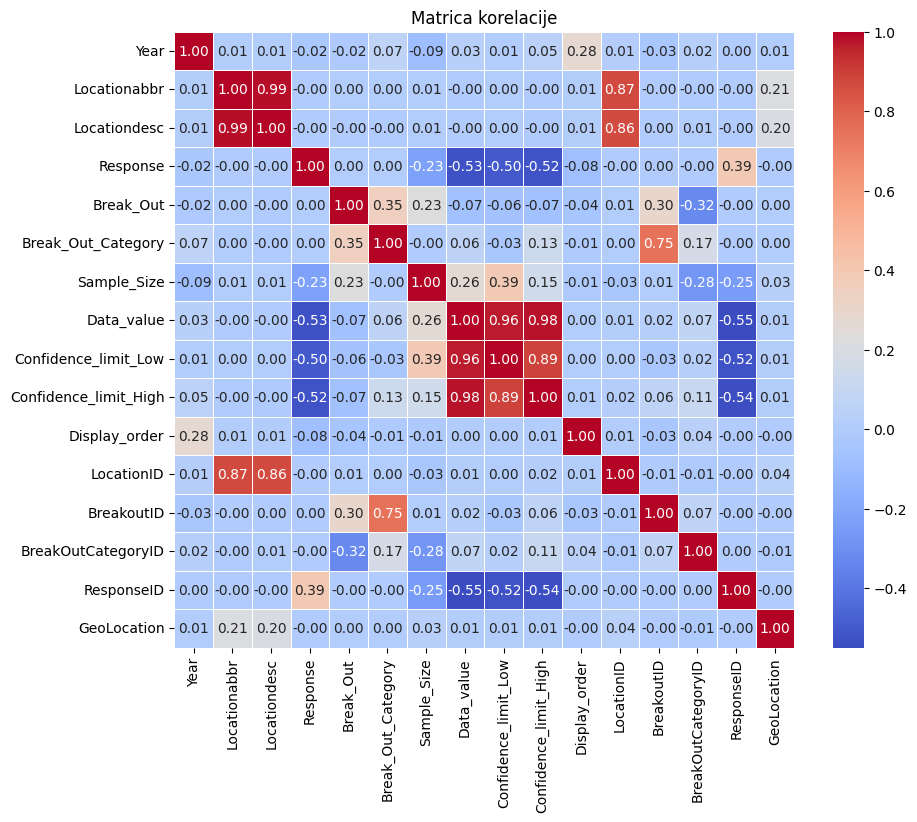

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Učitaj podatke
data = pd.read_csv('HealthBMI.csv')

# Izdvoji samo numeričke kolone
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Konvertuj kategoričke kolone u numeričke koristeći Label Encoding
label_encoder = LabelEncoder()
for column in data.columns:
    if column not in numeric_columns:
        data[column] = label_encoder.fit_transform(data[column])

# Izuzmi određene kolone prije izračunavanja matrice korelacije
columns_to_exclude = ['Class', 'Topic', 'Question', 'Data_Value_Footnote_Symbol', 'Data_Value_Footnote','Data_value_unit', 'Data_value_type', 'DataSource', 'ClassId', 'TopicId', 'QuestionID']
data_for_corr = data.drop(columns=columns_to_exclude, errors='ignore')

# Vizualizacija korelacija između svih atributa
corr_matrix = data_for_corr.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matrica korelacije')
plt.show()






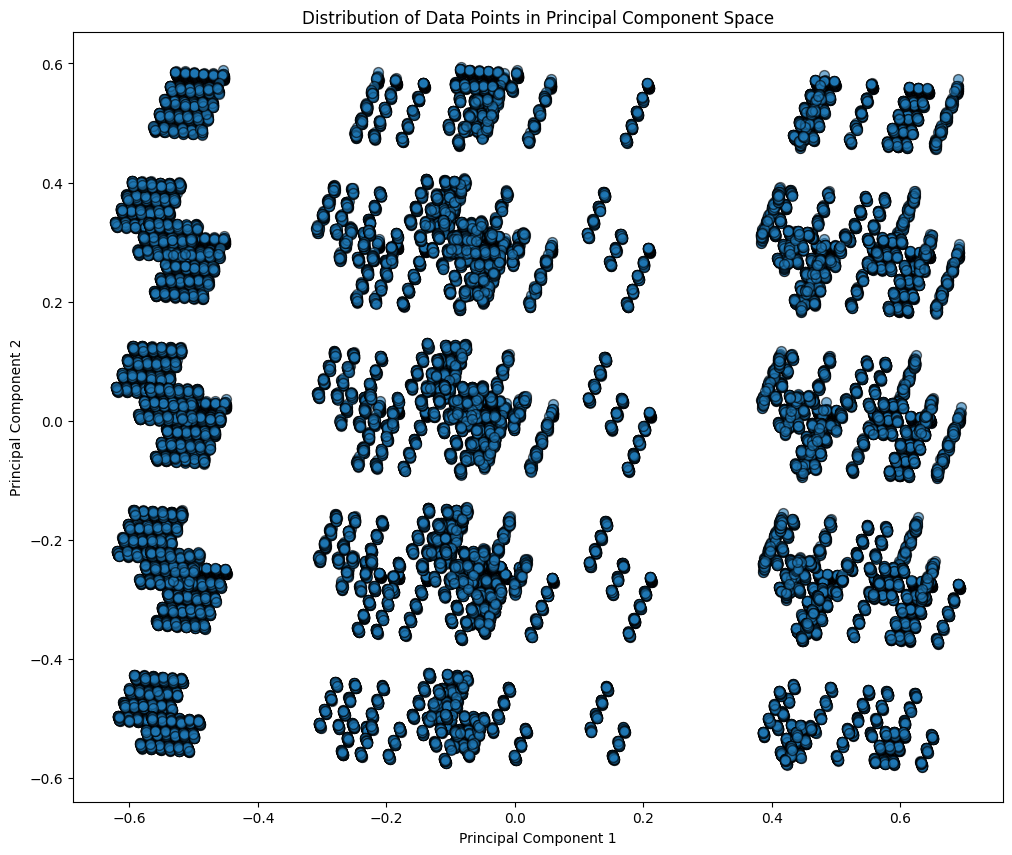

In [13]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
X_pca = pca.fit_transform(data_scaled)

# Plot PCA
plt.figure(figsize=(12, 10))
plt.scatter(X_pca[:, 0], X_pca[:, 1], edgecolor='k', s=50, alpha=0.6)
plt.title('Distribution of Data Points in Principal Component Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()



	Analiza i Interpretacija Rezultata:

•	Analiza važnosti obeležja dobijenih iz modela.

•	Interpretacija uticaja različitih faktora na konačne ocene i odluku o upisu na visokoškolsko obrazovanje.


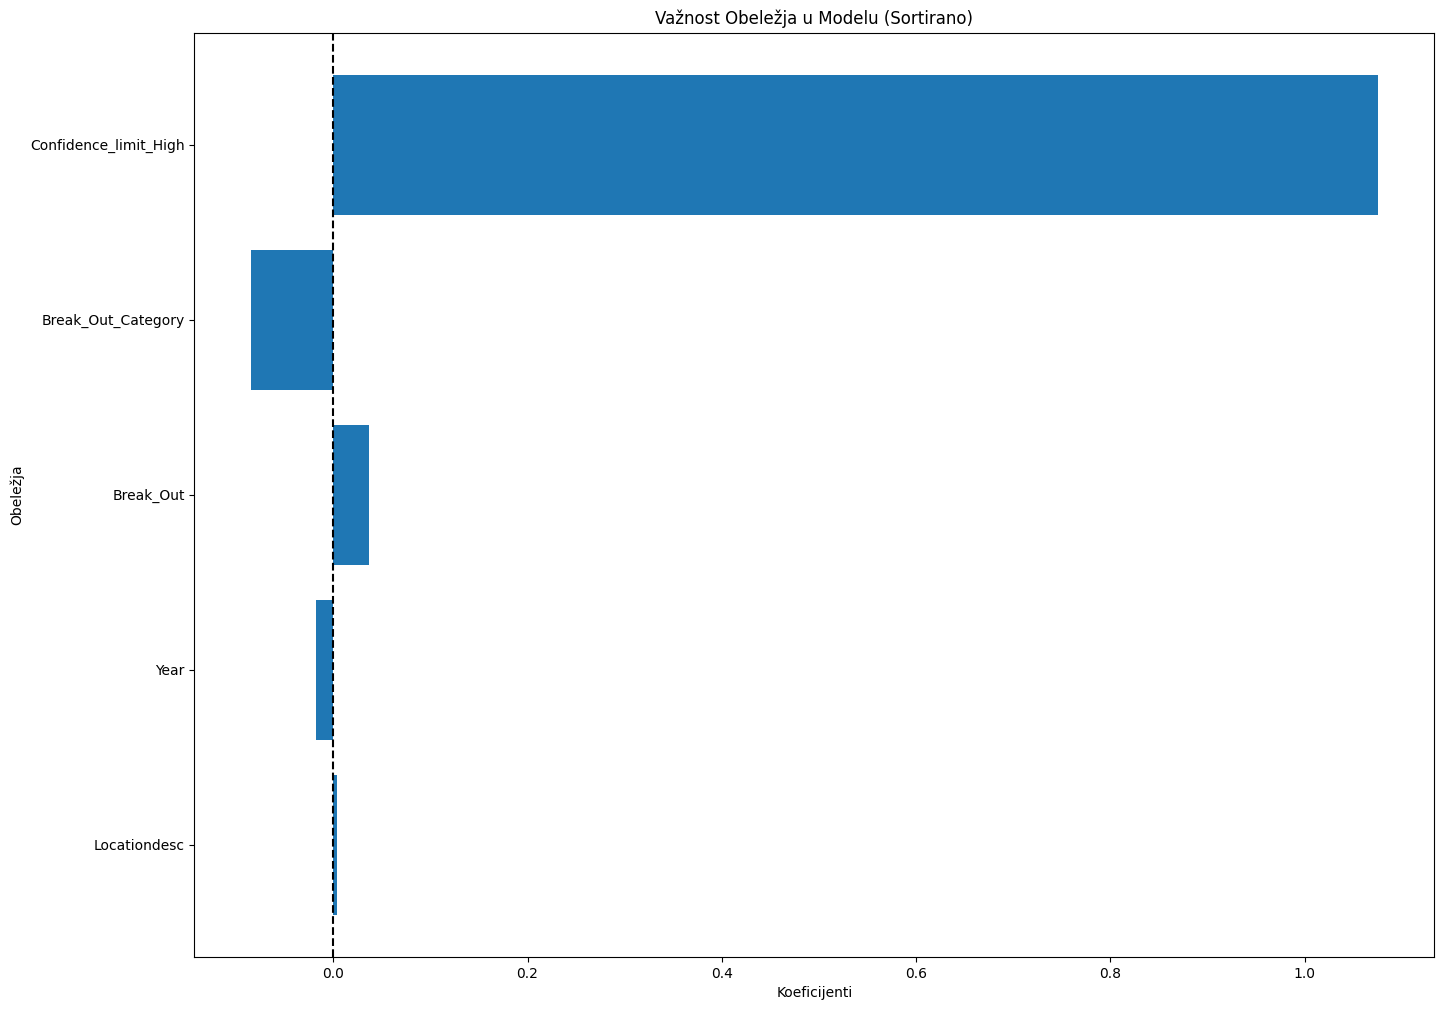

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Load the data
data = pd.read_csv('HealthBMI.csv')

# Select relevant columns
data = data[["Year", "Locationdesc", "Break_Out", 'Break_Out_Category', 'Confidence_limit_High','Confidence_limit_Low']]

# Drop rows with missing values
data.dropna(inplace=True)

# Label Encoding
label_encoder = LabelEncoder()
data['Locationdesc'] = label_encoder.fit_transform(data['Locationdesc'])
data['Break_Out'] = label_encoder.fit_transform(data['Break_Out'])
data['Break_Out_Category'] = label_encoder.fit_transform(data['Break_Out_Category'])

# Normalization
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Splitting data
X = data_scaled[:, :-1]
y = data_scaled[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

# Define the regularization parameter
alpha_ridge = 0.1  # Regularization parameter for Ridge

# Define and fit the Ridge model
ridge_model = Ridge(alpha=alpha_ridge)
ridge_model.fit(X_train, y_train)

# Get feature importance
coefficients = ridge_model.coef_
sorted_indices = np.argsort(np.abs(coefficients))
sorted_features = data.columns[sorted_indices]
sorted_coefficients = coefficients[sorted_indices]

# Plot feature importance
plt.figure(figsize=(16, 12))  # Povećana visina grafika
plt.barh(sorted_features, sorted_coefficients)
plt.axvline(x=0, color='black', linestyle='--')
plt.xlabel('Koeficijenti')
plt.ylabel('Obeležja')
plt.title('Važnost Obeležja u Modelu (Sortirano)')
plt.show()


Prosečni, minimalni i maksimalni Low Confidence Limit za starosne grupe 'Underweight' kategorije:
               mean  min  max
Break_Out                    
18-24      2.748736  1.1  5.7
25-34      1.094012  0.4  2.1
35-44      0.690588  0.2  1.7
45-54      0.621053  0.2  1.2
55-64      0.690456  0.3  1.8
65+        1.139080  0.2  3.6


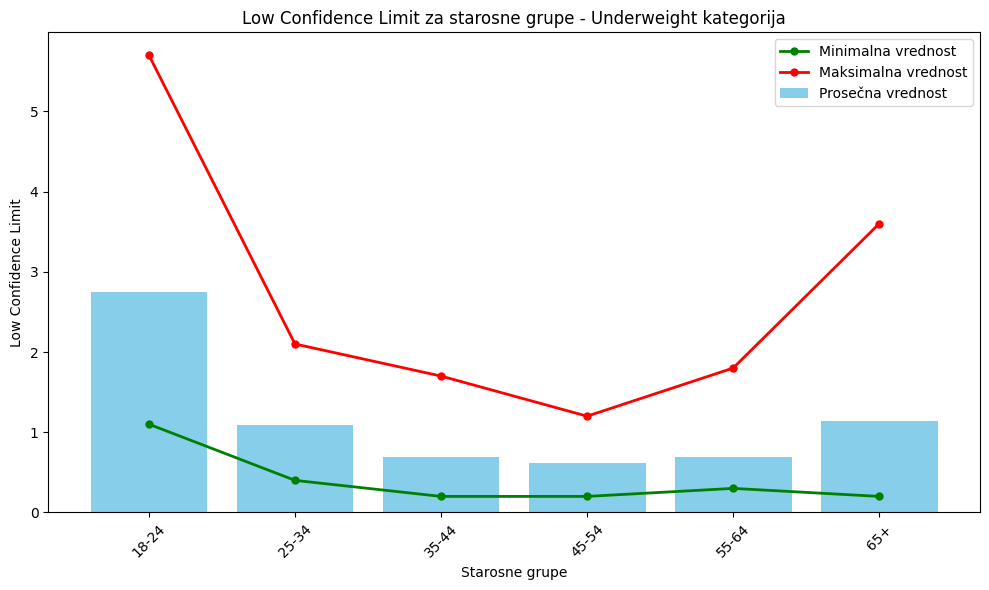

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Učitavanje podataka iz CSV fajla
data = pd.read_csv('HealthBMI.csv')

# Filtriranje podataka za "Underweight" Response
underweight_data = data[data['Response'] == 'Underweight (BMI 12.0-18.4)']

# Odabir željene vrednosti iz Break_Out_Category
desired_category = 'Age Group'
filtered_data = underweight_data[underweight_data['Break_Out_Category'] == desired_category]

# Grupisanje podataka i računanje prosečnih, minimalnih i maksimalnih Low_Confidence_Limit
confidence_limit_stats = filtered_data.groupby('Break_Out')['Confidence_limit_Low'].agg(['mean', 'min', 'max'])

# Prikaz rezultata
print("Prosečni, minimalni i maksimalni Low Confidence Limit za starosne grupe 'Underweight' kategorije:")
print(confidence_limit_stats)

# Kreiranje grafa
plt.figure(figsize=(10, 6))

# Bar graf za prosečne vrednosti
plt.bar(confidence_limit_stats.index, confidence_limit_stats['mean'], color='skyblue', label='Prosečna vrednost')

# Dodavanje linija za minimalne i maksimalne vrednosti
plt.plot(confidence_limit_stats.index, confidence_limit_stats['min'], color='green', marker='o', linestyle='-', linewidth=2, markersize=5, label='Minimalna vrednost')
plt.plot(confidence_limit_stats.index, confidence_limit_stats['max'], color='red', marker='o', linestyle='-', linewidth=2, markersize=5, label='Maksimalna vrednost')

# Dodavanje oznaka i legende
plt.xlabel('Starosne grupe')
plt.ylabel('Low Confidence Limit')
plt.title('Low Confidence Limit za starosne grupe - Underweight kategorija')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Prikazivanje grafa
plt.show()


Prosečni, minimalni i maksimalni Low Confidence Limit za starosne grupe 'Normalweight' kategorije:
                mean   min   max
Break_Out                       
18-24      45.012605  25.8  59.8
25-34      31.023480  14.6  51.5
35-44      24.905660  12.9  38.7
45-54      22.634737  10.7  35.4
55-64      22.981132   8.0  38.3
65+        28.546331  19.5  43.9


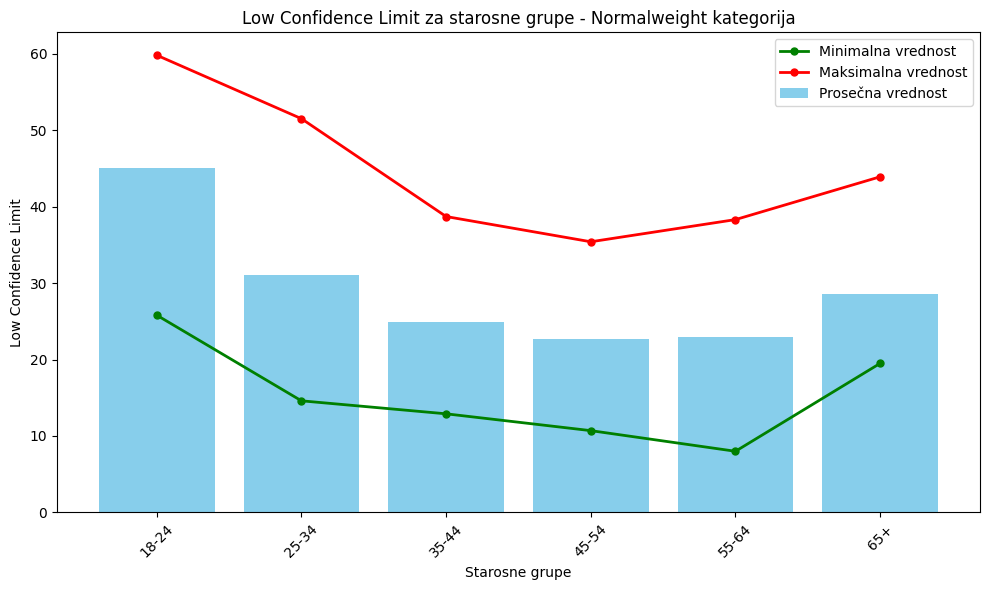

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Učitavanje podataka iz CSV fajla
data = pd.read_csv('HealthBMI.csv')

# Filtriranje podataka za "Normalweight" Response
normalweight_data = data[data['Response'] == 'Normal Weight (BMI 18.5-24.9)']

# Odabir željene vrednosti iz Break_Out_Category
desired_category = 'Age Group'
filtered_data = normalweight_data[normalweight_data['Break_Out_Category'] == desired_category]

# Grupisanje podataka i računanje prosečnih, minimalnih i maksimalnih Low_Confidence_Limit
confidence_limit_stats = filtered_data.groupby('Break_Out')['Confidence_limit_Low'].agg(['mean', 'min', 'max'])

# Prikaz rezultata
print("Prosečni, minimalni i maksimalni Low Confidence Limit za starosne grupe 'Normalweight' kategorije:")
print(confidence_limit_stats)

# Kreiranje grafa
plt.figure(figsize=(10, 6))

# Bar graf za prosečne vrednosti
plt.bar(confidence_limit_stats.index, confidence_limit_stats['mean'], color='skyblue', label='Prosečna vrednost')

# Dodavanje linija za minimalne i maksimalne vrednosti
plt.plot(confidence_limit_stats.index, confidence_limit_stats['min'], color='green', marker='o', linestyle='-', linewidth=2, markersize=5, label='Minimalna vrednost')
plt.plot(confidence_limit_stats.index, confidence_limit_stats['max'], color='red', marker='o', linestyle='-', linewidth=2, markersize=5, label='Maksimalna vrednost')

# Dodavanje oznaka i legende
plt.xlabel('Starosne grupe')
plt.ylabel('Low Confidence Limit')
plt.title('Low Confidence Limit za starosne grupe - Normalweight kategorija')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Prikazivanje grafa
plt.show()


Prosečni, minimalni i maksimalni Low Confidence Limit za starosne grupe 'Obese' i 'Overweight' kategorije:

                      Response Break_Out       mean   min   max
0      Obese (BMI 30.0 - 99.8)     18-24  13.573673   4.5  24.6
1      Obese (BMI 30.0 - 99.8)     25-34  25.202101  11.5  40.9
2      Obese (BMI 30.0 - 99.8)     35-44  30.176730  15.2  42.7
3      Obese (BMI 30.0 - 99.8)     45-54  32.564780  17.6  46.6
4      Obese (BMI 30.0 - 99.8)     55-64  31.783648  16.7  43.6
5      Obese (BMI 30.0 - 99.8)       65+  25.331447   9.4  34.4
6   Overweight (BMI 25.0-29.9)     18-24  20.237474  10.7  29.0
7   Overweight (BMI 25.0-29.9)     25-34  28.374423  16.8  34.3
8   Overweight (BMI 25.0-29.9)     35-44  31.224528   8.8  39.7
9   Overweight (BMI 25.0-29.9)     45-54  32.477358  12.3  42.6
10  Overweight (BMI 25.0-29.9)     55-64  33.853040  13.2  40.7
11  Overweight (BMI 25.0-29.9)       65+  36.005870  20.7  42.1



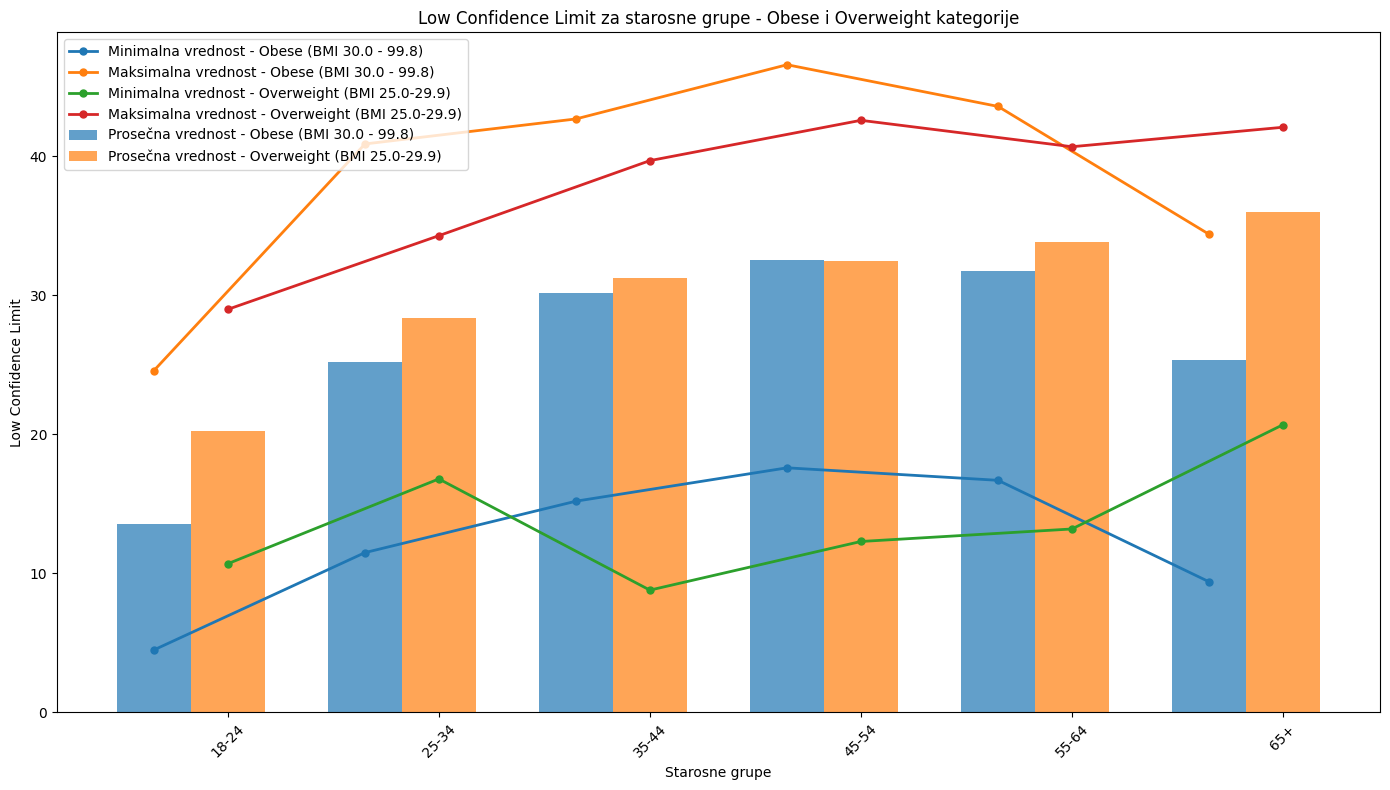

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Pretpostavljam da ste već učitali podatke i filtrirali ih kao što ste naveli
# Filtriranje podataka za "Obese" i "Overweight" Response
overweight_obese_data = data[data['Response'].isin(['Obese (BMI 30.0 - 99.8)', 'Overweight (BMI 25.0-29.9)'])]

# Odabir željene vrednosti iz Break_Out_Category
desired_category = 'Age Group'
filtered_data = overweight_obese_data[overweight_obese_data['Break_Out_Category'] == desired_category]

# Grupisanje podataka i računanje prosečnih, minimalnih i maksimalnih Low_Confidence_Limit
confidence_limit_stats = filtered_data.groupby(['Response', 'Break_Out'])['Confidence_limit_Low'].agg(['mean', 'min', 'max']).reset_index()

# Prikaz rezultata
print("Prosečni, minimalni i maksimalni Low Confidence Limit za starosne grupe 'Obese' i 'Overweight' kategorije:")
print("")
print(confidence_limit_stats)
print("")

# Kreiranje grafa
fig, ax = plt.subplots(figsize=(14, 8))

bar_width = 0.35
age_groups = confidence_limit_stats['Break_Out'].unique()
index = range(len(age_groups))

# Kreiranje bar grafa za prosečne vrednosti sa različitim bojama
for i, response in enumerate(confidence_limit_stats['Response'].unique()):
    response_data = confidence_limit_stats[confidence_limit_stats['Response'] == response]
    bar_positions = [p + bar_width*i for p in index]
    ax.bar(bar_positions, response_data['mean'], width=bar_width, label=f'Prosečna vrednost - {response}', alpha=0.7)

# Dodavanje linija za minimalne i maksimalne vrednosti
for response in confidence_limit_stats['Response'].unique():
    response_data = confidence_limit_stats[confidence_limit_stats['Response'] == response]
    bar_positions = [p + bar_width*list(confidence_limit_stats['Response'].unique()).index(response) for p in index]
    ax.plot(bar_positions, response_data['min'], marker='o', linestyle='-', linewidth=2, markersize=5, label=f'Minimalna vrednost - {response}')
    ax.plot(bar_positions, response_data['max'], marker='o', linestyle='-', linewidth=2, markersize=5, label=f'Maksimalna vrednost - {response}')

# Dodavanje oznaka i legende
ax.set_xlabel('Starosne grupe')
ax.set_ylabel('Low Confidence Limit')
ax.set_title('Low Confidence Limit za starosne grupe - Obese i Overweight kategorije')
ax.set_xticks([p + bar_width for p in index])
ax.set_xticklabels(age_groups, rotation=45)
ax.legend()
plt.tight_layout()

# Prikazivanje grafa
plt.show()


Analiza confidence levela po race/ethnicity za underweight kategoriju

Prosečni, minimalni i maksimalni Low Confidence Limit za različite rase 'Underweight' kategorije:
                                                        mean  min  max
Break_Out                                                             
American Indian or Alaskan Native, non-Hispanic          NaN  NaN  NaN
Asian, non-Hispanic                                 2.248000  1.2  4.0
Black, non-Hispanic                                 0.827660  0.4  2.3
Hispanic                                            1.018644  0.6  1.8
Multiracial, non-Hispanic                           1.145455  0.7  2.4
Native Hawaiian or other Pacific Islander, non-...       NaN  NaN  NaN
Other, non-Hispanic                                 2.130435  1.1  4.0
White, non-Hispanic                                 1.283700  0.3  2.4


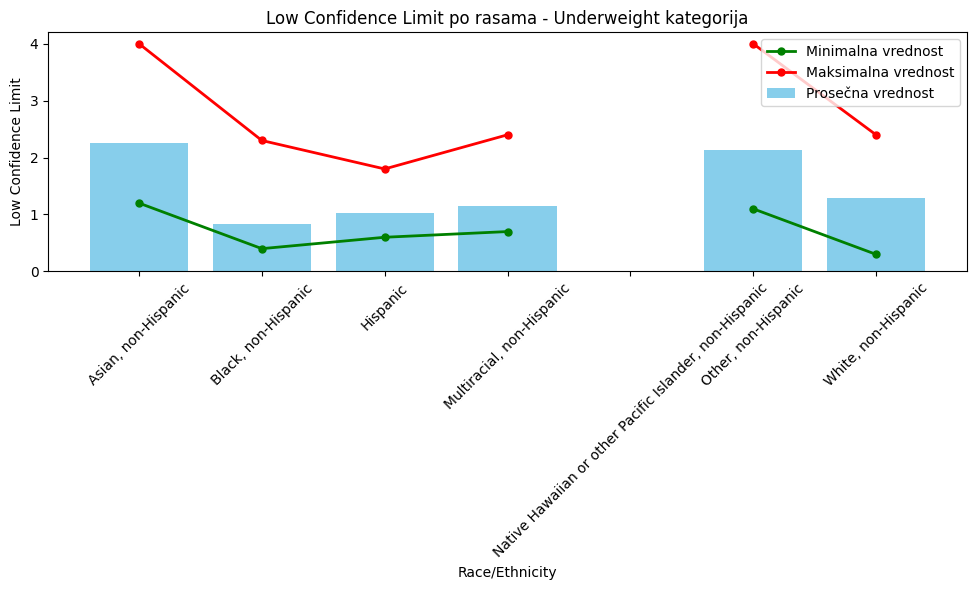

In [13]:
# Učitavanje podataka iz CSV fajla
data = pd.read_csv('HealthBMI.csv')

# Filtriranje podataka za "Underweight" Response
underweight_data = data[data['Response'] == 'Underweight (BMI 12.0-18.4)']

# Odabir željene vrednosti iz Break_Out_Category
desired_category = 'Race/Ethnicity'
filtered_data = underweight_data[underweight_data['Break_Out_Category'] == desired_category]

# Grupisanje podataka i računanje prosečnih, minimalnih i maksimalnih Low_Confidence_Limit
confidence_limit_stats = filtered_data.groupby('Break_Out')['Confidence_limit_Low'].agg(['mean', 'min', 'max'])

# Prikaz rezultata
print("Prosečni, minimalni i maksimalni Low Confidence Limit za različite rase 'Underweight' kategorije:")
print(confidence_limit_stats)

# Kreiranje grafa
plt.figure(figsize=(10, 6))

# Bar graf za prosečne vrednosti
plt.bar(confidence_limit_stats.index, confidence_limit_stats['mean'], color='skyblue', label='Prosečna vrednost')

# Dodavanje linija za minimalne i maksimalne vrednosti
plt.plot(confidence_limit_stats.index, confidence_limit_stats['min'], color='green', marker='o', linestyle='-', linewidth=2, markersize=5, label='Minimalna vrednost')
plt.plot(confidence_limit_stats.index, confidence_limit_stats['max'], color='red', marker='o', linestyle='-', linewidth=2, markersize=5, label='Maksimalna vrednost')

# Dodavanje oznaka i legende
plt.xlabel('Race/Ethnicity')
plt.ylabel('Low Confidence Limit')
plt.title('Low Confidence Limit po rasama - Underweight kategorija')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Prikazivanje grafa
plt.show()

Analiza confidence levela po race/ethnicity za normalweight

Prosečni, minimalni i maksimalni Low Confidence Limit po Race/Ethnicity kategoriji 'Normalweight' kategorije:
                                                         mean   min   max
Break_Out                                                                
American Indian or Alaskan Native, non-Hispanic     16.306618   6.4  32.0
Asian, non-Hispanic                                 39.810227  17.4  59.5
Black, non-Hispanic                                 20.253175   6.5  36.2
Hispanic                                            22.412473   9.2  49.8
Multiracial, non-Hispanic                           21.774083   4.5  40.7
Native Hawaiian or other Pacific Islander, non-...  16.593333   9.0  21.1
Other, non-Hispanic                                 30.475704   8.2  53.3
White, non-Hispanic                                 31.800000  18.0  56.5


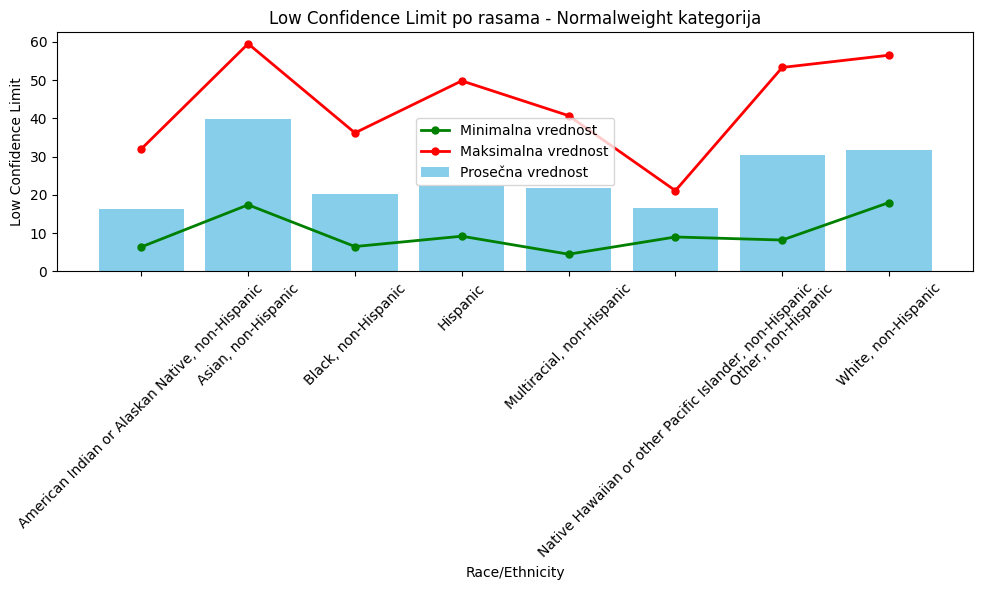

In [14]:
data = pd.read_csv('HealthBMI.csv')

# Filtriranje podataka za "Normalweight" Response
normalweight_data = data[data['Response'] == 'Normal Weight (BMI 18.5-24.9)']

# Odabir željene vrednosti iz Break_Out_Category
desired_category = 'Race/Ethnicity'
filtered_data = normalweight_data[normalweight_data['Break_Out_Category'] == desired_category]

# Grupisanje podataka i računanje prosečnih, minimalnih i maksimalnih Low_Confidence_Limit
confidence_limit_stats = filtered_data.groupby('Break_Out')['Confidence_limit_Low'].agg(['mean', 'min', 'max'])

# Prikaz rezultata
print("Prosečni, minimalni i maksimalni Low Confidence Limit po Race/Ethnicity kategoriji 'Normalweight' kategorije:")
print(confidence_limit_stats)

# Kreiranje grafa
plt.figure(figsize=(10, 6))

# Bar graf za prosečne vrednosti
plt.bar(confidence_limit_stats.index, confidence_limit_stats['mean'], color='skyblue', label='Prosečna vrednost')

# Dodavanje linija za minimalne i maksimalne vrednosti
plt.plot(confidence_limit_stats.index, confidence_limit_stats['min'], color='green', marker='o', linestyle='-', linewidth=2, markersize=5, label='Minimalna vrednost')
plt.plot(confidence_limit_stats.index, confidence_limit_stats['max'], color='red', marker='o', linestyle='-', linewidth=2, markersize=5, label='Maksimalna vrednost')

# Dodavanje oznaka i legende
plt.xlabel('Race/Ethnicity')
plt.ylabel('Low Confidence Limit')
plt.title('Low Confidence Limit po rasama - Normalweight kategorija')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

Analiza confidence levela po rasama za obese i overweight

Prosečni, minimalni i maksimalni Low Confidence Limit po rasama 'Obese' i 'Overweight' kategorije:

                      Response  \
0      Obese (BMI 30.0 - 99.8)   
1      Obese (BMI 30.0 - 99.8)   
2      Obese (BMI 30.0 - 99.8)   
3      Obese (BMI 30.0 - 99.8)   
4      Obese (BMI 30.0 - 99.8)   
5      Obese (BMI 30.0 - 99.8)   
6      Obese (BMI 30.0 - 99.8)   
7      Obese (BMI 30.0 - 99.8)   
8   Overweight (BMI 25.0-29.9)   
9   Overweight (BMI 25.0-29.9)   
10  Overweight (BMI 25.0-29.9)   
11  Overweight (BMI 25.0-29.9)   
12  Overweight (BMI 25.0-29.9)   
13  Overweight (BMI 25.0-29.9)   
14  Overweight (BMI 25.0-29.9)   
15  Overweight (BMI 25.0-29.9)   

                                            Break_Out       mean   min   max  
0     American Indian or Alaskan Native, non-Hispanic  26.676250   9.7  50.1  
1                                 Asian, non-Hispanic   8.229412   3.2  16.8  
2                                 Black, non-Hispanic  32.309186  11.4  46.9  
3    

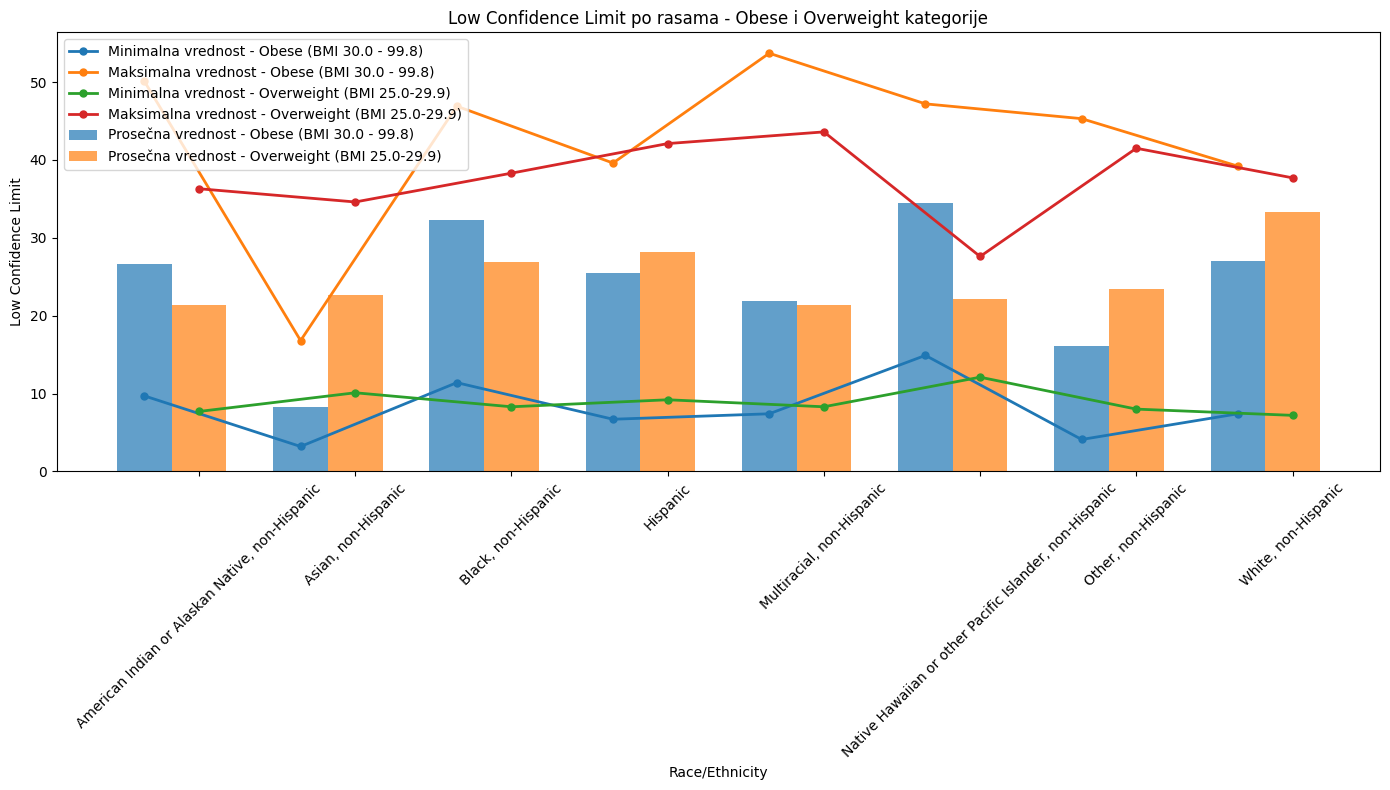

In [5]:
# Filtriranje podataka za "Obese" i "Overweight" Response
overweight_obese_data = data[data['Response'].isin(['Obese (BMI 30.0 - 99.8)', 'Overweight (BMI 25.0-29.9)'])]

# Odabir željene vrednosti iz Break_Out_Category
desired_category = 'Race/Ethnicity'
filtered_data = overweight_obese_data[overweight_obese_data['Break_Out_Category'] == desired_category]

# Grupisanje podataka i računanje prosečnih, minimalnih i maksimalnih Low_Confidence_Limit
confidence_limit_stats = filtered_data.groupby(['Response', 'Break_Out'])['Confidence_limit_Low'].agg(['mean', 'min', 'max']).reset_index()

# Prikaz rezultata
print("Prosečni, minimalni i maksimalni Low Confidence Limit po rasama 'Obese' i 'Overweight' kategorije:")
print("")
print(confidence_limit_stats)
print("")

# Kreiranje grafa
fig, ax = plt.subplots(figsize=(14, 8))

bar_width = 0.35
age_groups = confidence_limit_stats['Break_Out'].unique()
index = range(len(age_groups))

# Kreiranje bar grafa za prosečne vrednosti sa različitim bojama
for i, response in enumerate(confidence_limit_stats['Response'].unique()):
    response_data = confidence_limit_stats[confidence_limit_stats['Response'] == response]
    bar_positions = [p + bar_width*i for p in index]
    ax.bar(bar_positions, response_data['mean'], width=bar_width, label=f'Prosečna vrednost - {response}', alpha=0.7)

# Dodavanje linija za minimalne i maksimalne vrednosti
for response in confidence_limit_stats['Response'].unique():
    response_data = confidence_limit_stats[confidence_limit_stats['Response'] == response]
    bar_positions = [p + bar_width*list(confidence_limit_stats['Response'].unique()).index(response) for p in index]
    ax.plot(bar_positions, response_data['min'], marker='o', linestyle='-', linewidth=2, markersize=5, label=f'Minimalna vrednost - {response}')
    ax.plot(bar_positions, response_data['max'], marker='o', linestyle='-', linewidth=2, markersize=5, label=f'Maksimalna vrednost - {response}')

# Dodavanje oznaka i legende
ax.set_xlabel('Race/Ethnicity')
ax.set_ylabel('Low Confidence Limit')
ax.set_title('Low Confidence Limit po rasama - Obese i Overweight kategorije')
ax.set_xticks([p + bar_width for p in index])
ax.set_xticklabels(age_groups, rotation=45)
ax.legend()
plt.tight_layout()

# Prikazivanje grafa
plt.show()

In [10]:
print(data['Break_Out_Category'].unique())

['Age Group' 'Race/Ethnicity' 'Education Attained' 'Household Income'
 'Gender' 'Overall']


Analiza confidence levela za underweight kategoriju po obrazovanju

Prosečni, minimalni i maksimalni Low Confidence Limit za različite rase 'Underweight' kategorije:
                      mean  min  max
Break_Out                           
College graduate  0.874219  0.3  2.2
H.S. or G.E.D.    1.244221  0.4  3.0
Less than H.S.    1.414130  0.5  4.0
Some post-H.S.    1.032698  0.4  2.2


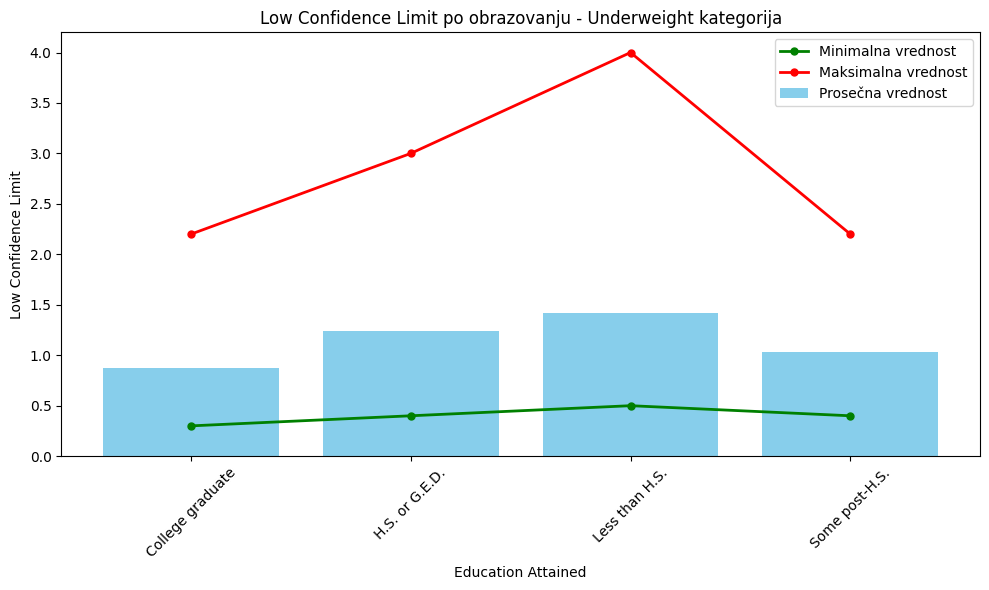

In [12]:
# Učitavanje podataka iz CSV fajla
data = pd.read_csv('HealthBMI.csv')

# Filtriranje podataka za "Underweight" Response
underweight_data = data[data['Response'] == 'Underweight (BMI 12.0-18.4)']

# Odabir željene vrednosti iz Break_Out_Category
desired_category = 'Education Attained'
filtered_data = underweight_data[underweight_data['Break_Out_Category'] == desired_category]

# Grupisanje podataka i računanje prosečnih, minimalnih i maksimalnih Low_Confidence_Limit
confidence_limit_stats = filtered_data.groupby('Break_Out')['Confidence_limit_Low'].agg(['mean', 'min', 'max'])

# Prikaz rezultata
print("Prosečni, minimalni i maksimalni Low Confidence Limit za različite rase 'Underweight' kategorije:")
print(confidence_limit_stats)

# Kreiranje grafa
plt.figure(figsize=(10, 6))

# Bar graf za prosečne vrednosti
plt.bar(confidence_limit_stats.index, confidence_limit_stats['mean'], color='skyblue', label='Prosečna vrednost')

# Dodavanje linija za minimalne i maksimalne vrednosti
plt.plot(confidence_limit_stats.index, confidence_limit_stats['min'], color='green', marker='o', linestyle='-', linewidth=2, markersize=5, label='Minimalna vrednost')
plt.plot(confidence_limit_stats.index, confidence_limit_stats['max'], color='red', marker='o', linestyle='-', linewidth=2, markersize=5, label='Maksimalna vrednost')

# Dodavanje oznaka i legende
plt.xlabel('Education Attained')
plt.ylabel('Low Confidence Limit')
plt.title('Low Confidence Limit po obrazovanju - Underweight kategorija')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Prikazivanje grafa
plt.show()

Prosečni, minimalni i maksimalni Low Confidence Limit po Race/Ethnicity kategoriji 'Normalweight' kategorije:
                       mean   min   max
Break_Out                              
College graduate  34.022013  12.9  53.5
H.S. or G.E.D.    27.479036  11.7  38.3
Less than H.S.    23.515094   9.9  37.4
Some post-H.S.    28.293908  17.6  39.5


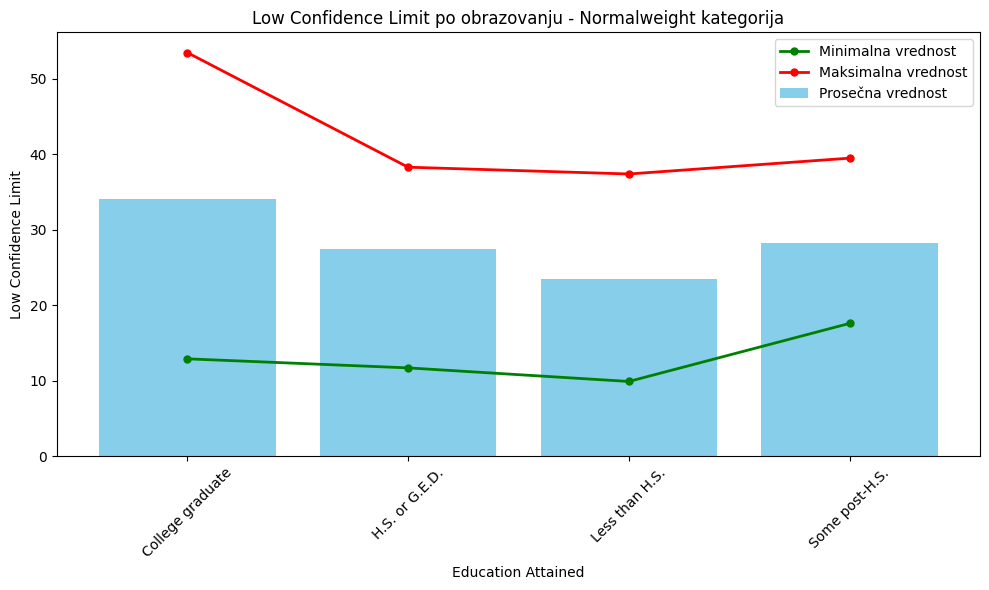

In [15]:
data = pd.read_csv('HealthBMI.csv')

# Filtriranje podataka za "Normalweight" Response
normalweight_data = data[data['Response'] == 'Normal Weight (BMI 18.5-24.9)']

# Odabir željene vrednosti iz Break_Out_Category
desired_category = 'Education Attained'
filtered_data = normalweight_data[normalweight_data['Break_Out_Category'] == desired_category]

# Grupisanje podataka i računanje prosečnih, minimalnih i maksimalnih Low_Confidence_Limit
confidence_limit_stats = filtered_data.groupby('Break_Out')['Confidence_limit_Low'].agg(['mean', 'min', 'max'])

# Prikaz rezultata
print("Prosečni, minimalni i maksimalni Low Confidence Limit po Race/Ethnicity kategoriji 'Normalweight' kategorije:")
print(confidence_limit_stats)

# Kreiranje grafa
plt.figure(figsize=(10, 6))

# Bar graf za prosečne vrednosti
plt.bar(confidence_limit_stats.index, confidence_limit_stats['mean'], color='skyblue', label='Prosečna vrednost')

# Dodavanje linija za minimalne i maksimalne vrednosti
plt.plot(confidence_limit_stats.index, confidence_limit_stats['min'], color='green', marker='o', linestyle='-', linewidth=2, markersize=5, label='Minimalna vrednost')
plt.plot(confidence_limit_stats.index, confidence_limit_stats['max'], color='red', marker='o', linestyle='-', linewidth=2, markersize=5, label='Maksimalna vrednost')

# Dodavanje oznaka i legende
plt.xlabel('Education Attained')
plt.ylabel('Low Confidence Limit')
plt.title('Low Confidence Limit po obrazovanju - Normalweight kategorija')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

Prosečni, minimalni i maksimalni Low Confidence Limit po rasama 'Obese' i 'Overweight' kategorije:

                     Response         Break_Out       mean   min   max
0     Obese (BMI 30.0 - 99.8)  College graduate  22.713208  10.2  36.0
1     Obese (BMI 30.0 - 99.8)    H.S. or G.E.D.  29.779665  19.6  40.3
2     Obese (BMI 30.0 - 99.8)    Less than H.S.  28.295388  10.2  40.4
3     Obese (BMI 30.0 - 99.8)    Some post-H.S.  29.434591  10.1  40.5
4  Overweight (BMI 25.0-29.9)  College graduate  34.239832  24.4  40.2
5  Overweight (BMI 25.0-29.9)    H.S. or G.E.D.  31.401258  19.1  38.3
6  Overweight (BMI 25.0-29.9)    Less than H.S.  27.329140  11.6  41.6
7  Overweight (BMI 25.0-29.9)    Some post-H.S.  31.396017  15.7  36.7



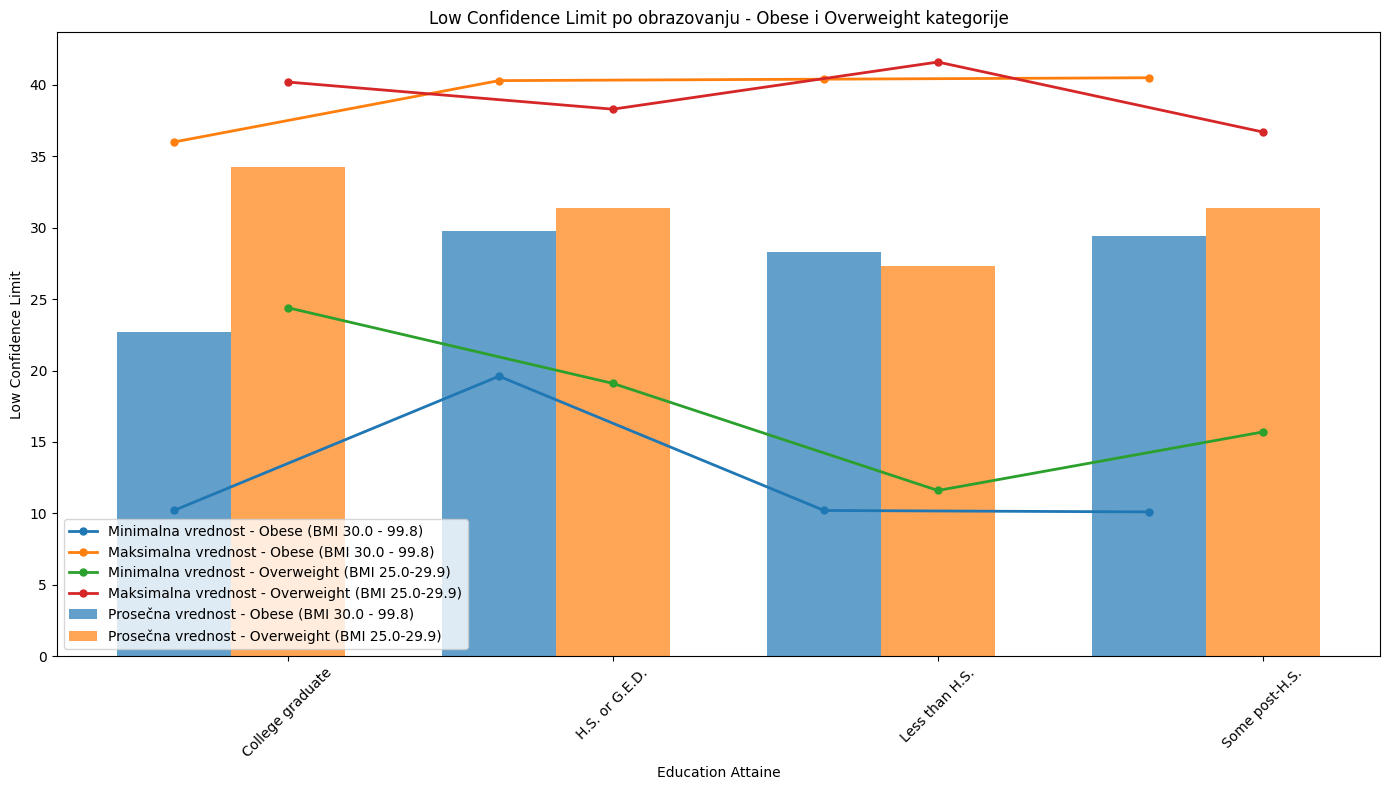

In [17]:
data = pd.read_csv('HealthBMI.csv')

# Odabir željene vrednosti iz Break_Out_Category
desired_category = 'Education Attained'
filtered_data = overweight_obese_data[overweight_obese_data['Break_Out_Category'] == desired_category]

# Grupisanje podataka i računanje prosečnih, minimalnih i maksimalnih Low_Confidence_Limit
confidence_limit_stats = filtered_data.groupby(['Response', 'Break_Out'])['Confidence_limit_Low'].agg(['mean', 'min', 'max']).reset_index()

# Prikaz rezultata
print("Prosečni, minimalni i maksimalni Low Confidence Limit po rasama 'Obese' i 'Overweight' kategorije:")
print("")
print(confidence_limit_stats)
print("")

# Kreiranje grafa
fig, ax = plt.subplots(figsize=(14, 8))

bar_width = 0.35
age_groups = confidence_limit_stats['Break_Out'].unique()
index = range(len(age_groups))

# Kreiranje bar grafa za prosečne vrednosti sa različitim bojama
for i, response in enumerate(confidence_limit_stats['Response'].unique()):
    response_data = confidence_limit_stats[confidence_limit_stats['Response'] == response]
    bar_positions = [p + bar_width*i for p in index]
    ax.bar(bar_positions, response_data['mean'], width=bar_width, label=f'Prosečna vrednost - {response}', alpha=0.7)

# Dodavanje linija za minimalne i maksimalne vrednosti
for response in confidence_limit_stats['Response'].unique():
    response_data = confidence_limit_stats[confidence_limit_stats['Response'] == response]
    bar_positions = [p + bar_width*list(confidence_limit_stats['Response'].unique()).index(response) for p in index]
    ax.plot(bar_positions, response_data['min'], marker='o', linestyle='-', linewidth=2, markersize=5, label=f'Minimalna vrednost - {response}')
    ax.plot(bar_positions, response_data['max'], marker='o', linestyle='-', linewidth=2, markersize=5, label=f'Maksimalna vrednost - {response}')

# Dodavanje oznaka i legende
ax.set_xlabel('Education Attaine')
ax.set_ylabel('Low Confidence Limit')
ax.set_title('Low Confidence Limit po obrazovanju - Obese i Overweight kategorije')
ax.set_xticks([p + bar_width for p in index])
ax.set_xticklabels(age_groups, rotation=45)
ax.legend()
plt.tight_layout()

# Prikazivanje grafa
plt.show()

Prosečni, minimalni i maksimalni Low Confidence Limit za različite rase 'Underweight' kategorije:
                       mean  min  max
Break_Out                            
$100,000-$199,999  0.621053  0.3  0.9
$15,000-$24,999    1.256098  0.5  2.2
$200,000+               NaN  NaN  NaN
$25,000-$34,999    1.098780  0.5  1.8
$35,000-$49,999    0.900000  0.3  2.2
$50,000+           0.721538  0.2  1.6
$50,000-$99,999    0.735294  0.4  1.7
Less than $15,000  1.596599  0.6  5.3


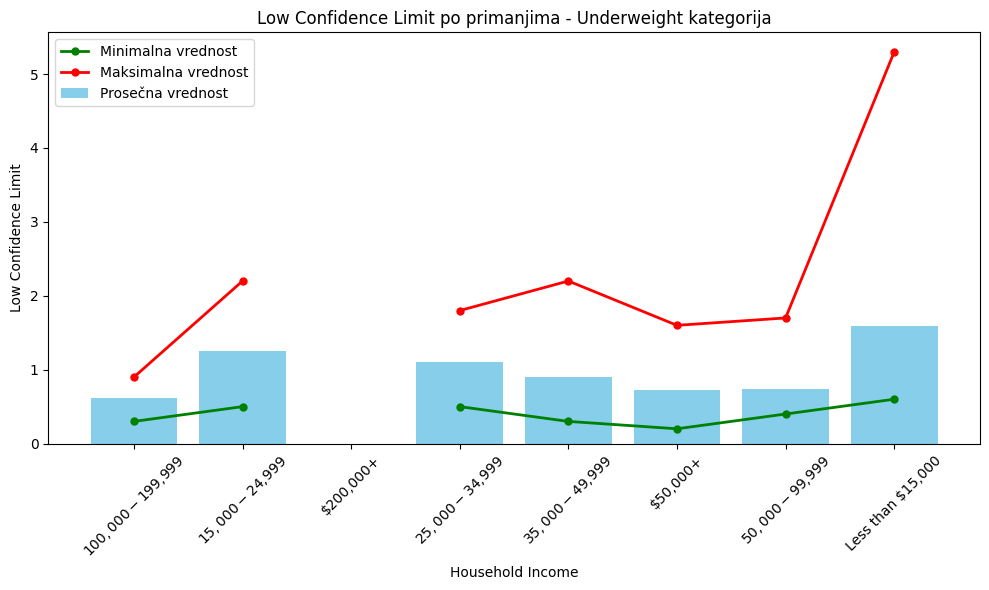

In [18]:
# Učitavanje podataka iz CSV fajla
data = pd.read_csv('HealthBMI.csv')

# Filtriranje podataka za "Underweight" Response
underweight_data = data[data['Response'] == 'Underweight (BMI 12.0-18.4)']

# Odabir željene vrednosti iz Break_Out_Category
desired_category = 'Household Income'
filtered_data = underweight_data[underweight_data['Break_Out_Category'] == desired_category]

# Grupisanje podataka i računanje prosečnih, minimalnih i maksimalnih Low_Confidence_Limit
confidence_limit_stats = filtered_data.groupby('Break_Out')['Confidence_limit_Low'].agg(['mean', 'min', 'max'])

# Prikaz rezultata
print("Prosečni, minimalni i maksimalni Low Confidence Limit za različite rase 'Underweight' kategorije:")
print(confidence_limit_stats)

# Kreiranje grafa
plt.figure(figsize=(10, 6))

# Bar graf za prosečne vrednosti
plt.bar(confidence_limit_stats.index, confidence_limit_stats['mean'], color='skyblue', label='Prosečna vrednost')

# Dodavanje linija za minimalne i maksimalne vrednosti
plt.plot(confidence_limit_stats.index, confidence_limit_stats['min'], color='green', marker='o', linestyle='-', linewidth=2, markersize=5, label='Minimalna vrednost')
plt.plot(confidence_limit_stats.index, confidence_limit_stats['max'], color='red', marker='o', linestyle='-', linewidth=2, markersize=5, label='Maksimalna vrednost')

# Dodavanje oznaka i legende
plt.xlabel('Household Income')
plt.ylabel('Low Confidence Limit')
plt.title('Low Confidence Limit po primanjima - Underweight kategorija')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Prikazivanje grafa
plt.show()

Prosečni, minimalni i maksimalni Low Confidence Limit po Race/Ethnicity kategoriji 'Normalweight' kategorije:
                        mean   min   max
Break_Out                               
$100,000-$199,999  24.839048  12.6  43.6
$15,000-$24,999    26.122432  11.9  38.4
$200,000+          27.802970  10.7  45.4
$25,000-$34,999    25.520964  12.9  40.4
$35,000-$49,999    25.656303  10.7  38.8
$50,000+           30.261081  19.5  48.9
$50,000-$99,999    24.622430  13.3  37.3
Less than $15,000  25.994316  11.2  42.2


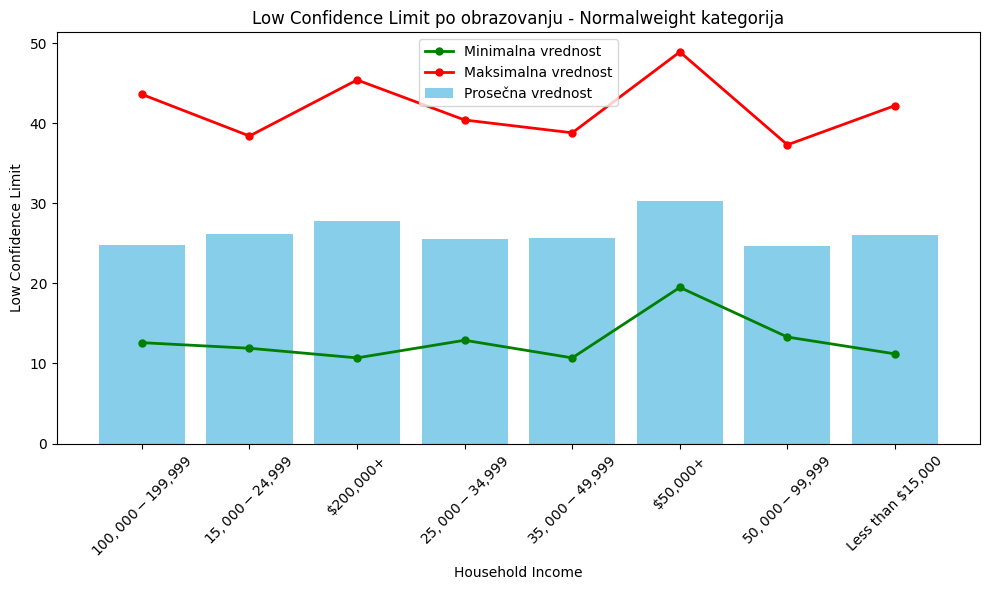

In [19]:
# Filtriranje podataka za "Normalweight" Response
normalweight_data = data[data['Response'] == 'Normal Weight (BMI 18.5-24.9)']

# Odabir željene vrednosti iz Break_Out_Category
desired_category = 'Household Income'
filtered_data = normalweight_data[normalweight_data['Break_Out_Category'] == desired_category]

# Grupisanje podataka i računanje prosečnih, minimalnih i maksimalnih Low_Confidence_Limit
confidence_limit_stats = filtered_data.groupby('Break_Out')['Confidence_limit_Low'].agg(['mean', 'min', 'max'])

# Prikaz rezultata
print("Prosečni, minimalni i maksimalni Low Confidence Limit po Race/Ethnicity kategoriji 'Normalweight' kategorije:")
print(confidence_limit_stats)

# Kreiranje grafa
plt.figure(figsize=(10, 6))

# Bar graf za prosečne vrednosti
plt.bar(confidence_limit_stats.index, confidence_limit_stats['mean'], color='skyblue', label='Prosečna vrednost')

# Dodavanje linija za minimalne i maksimalne vrednosti
plt.plot(confidence_limit_stats.index, confidence_limit_stats['min'], color='green', marker='o', linestyle='-', linewidth=2, markersize=5, label='Minimalna vrednost')
plt.plot(confidence_limit_stats.index, confidence_limit_stats['max'], color='red', marker='o', linestyle='-', linewidth=2, markersize=5, label='Maksimalna vrednost')

# Dodavanje oznaka i legende
plt.xlabel('Household Income')
plt.ylabel('Low Confidence Limit')
plt.title('Low Confidence Limit po primanjima - Normalweight kategorija')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

Prosečni, minimalni i maksimalni Low Confidence Limit po rasama 'Obese' i 'Overweight' kategorije:

                      Response          Break_Out       mean   min   max
0      Obese (BMI 30.0 - 99.8)  $100,000-$199,999  28.067290  13.6  38.8
1      Obese (BMI 30.0 - 99.8)    $15,000-$24,999  29.536478  11.9  42.8
2      Obese (BMI 30.0 - 99.8)          $200,000+  18.466019   7.7  27.6
3      Obese (BMI 30.0 - 99.8)    $25,000-$34,999  27.446429  13.1  42.1
4      Obese (BMI 30.0 - 99.8)    $35,000-$49,999  27.693501  14.3  41.9
5      Obese (BMI 30.0 - 99.8)           $50,000+  25.782703  12.5  37.5
6      Obese (BMI 30.0 - 99.8)    $50,000-$99,999  31.586916  18.2  40.5
7      Obese (BMI 30.0 - 99.8)  Less than $15,000  29.344328  13.9  44.2
8   Overweight (BMI 25.0-29.9)  $100,000-$199,999  33.509346  24.7  39.7
9   Overweight (BMI 25.0-29.9)    $15,000-$24,999  27.796008  12.1  36.7
10  Overweight (BMI 25.0-29.9)          $200,000+  31.322330  14.4  39.9
11  Overweight (BMI 25.0

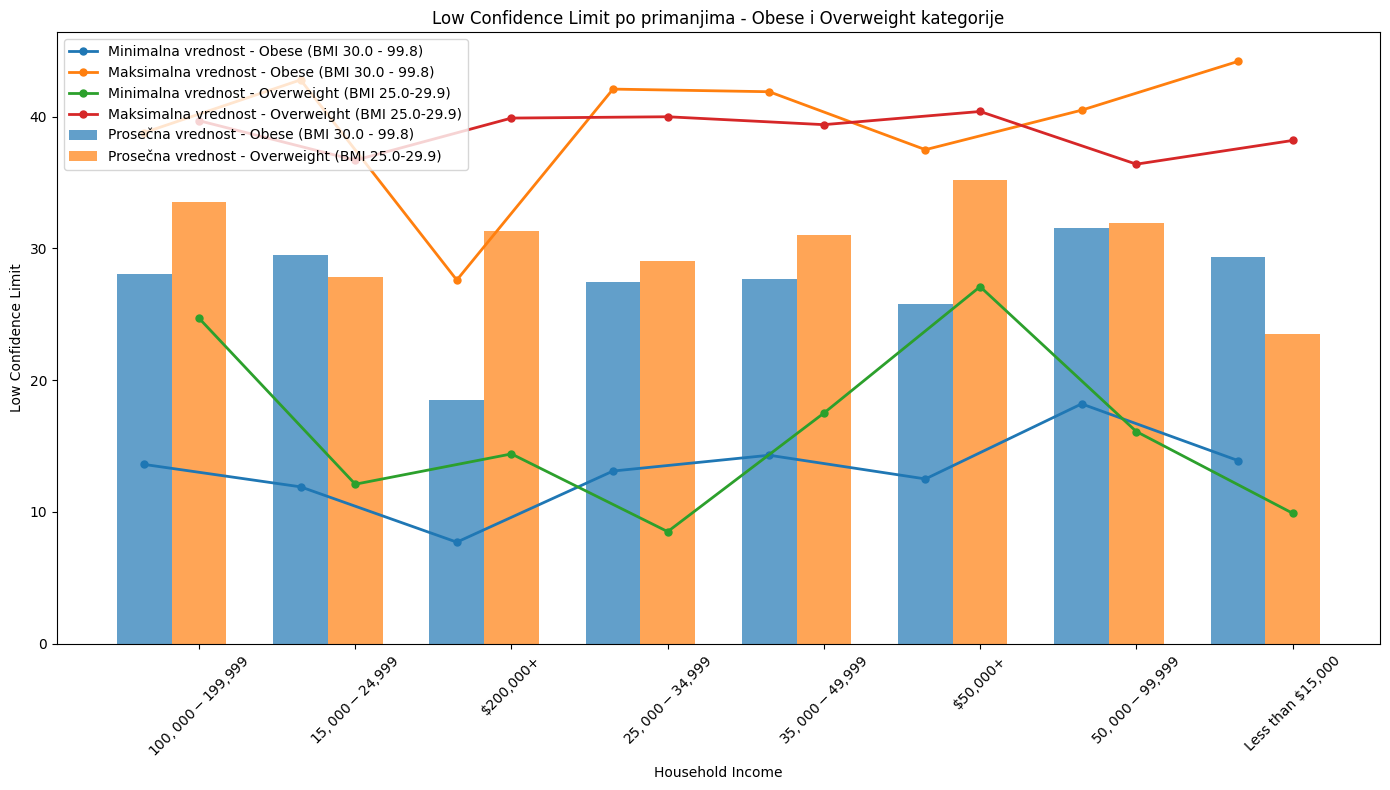

In [20]:
# Odabir željene vrednosti iz Break_Out_Category
desired_category = 'Household Income'
filtered_data = overweight_obese_data[overweight_obese_data['Break_Out_Category'] == desired_category]

# Grupisanje podataka i računanje prosečnih, minimalnih i maksimalnih Low_Confidence_Limit
confidence_limit_stats = filtered_data.groupby(['Response', 'Break_Out'])['Confidence_limit_Low'].agg(['mean', 'min', 'max']).reset_index()

# Prikaz rezultata
print("Prosečni, minimalni i maksimalni Low Confidence Limit po rasama 'Obese' i 'Overweight' kategorije:")
print("")
print(confidence_limit_stats)
print("")

# Kreiranje grafa
fig, ax = plt.subplots(figsize=(14, 8))

bar_width = 0.35
age_groups = confidence_limit_stats['Break_Out'].unique()
index = range(len(age_groups))

# Kreiranje bar grafa za prosečne vrednosti sa različitim bojama
for i, response in enumerate(confidence_limit_stats['Response'].unique()):
    response_data = confidence_limit_stats[confidence_limit_stats['Response'] == response]
    bar_positions = [p + bar_width*i for p in index]
    ax.bar(bar_positions, response_data['mean'], width=bar_width, label=f'Prosečna vrednost - {response}', alpha=0.7)

# Dodavanje linija za minimalne i maksimalne vrednosti
for response in confidence_limit_stats['Response'].unique():
    response_data = confidence_limit_stats[confidence_limit_stats['Response'] == response]
    bar_positions = [p + bar_width*list(confidence_limit_stats['Response'].unique()).index(response) for p in index]
    ax.plot(bar_positions, response_data['min'], marker='o', linestyle='-', linewidth=2, markersize=5, label=f'Minimalna vrednost - {response}')
    ax.plot(bar_positions, response_data['max'], marker='o', linestyle='-', linewidth=2, markersize=5, label=f'Maksimalna vrednost - {response}')

# Dodavanje oznaka i legende
ax.set_xlabel('Household Income')
ax.set_ylabel('Low Confidence Limit')
ax.set_title('Low Confidence Limit po primanjima - Obese i Overweight kategorije')
ax.set_xticks([p + bar_width for p in index])
ax.set_xticklabels(age_groups, rotation=45)
ax.legend()
plt.tight_layout()

# Prikazivanje grafa
plt.show()

Prosečni, minimalni i maksimalni Low Confidence Limit za različite rase 'Underweight' kategorije:
               mean  min  max
Break_Out                    
Female     1.656716  0.5  3.4
Male       0.793566  0.1  1.7


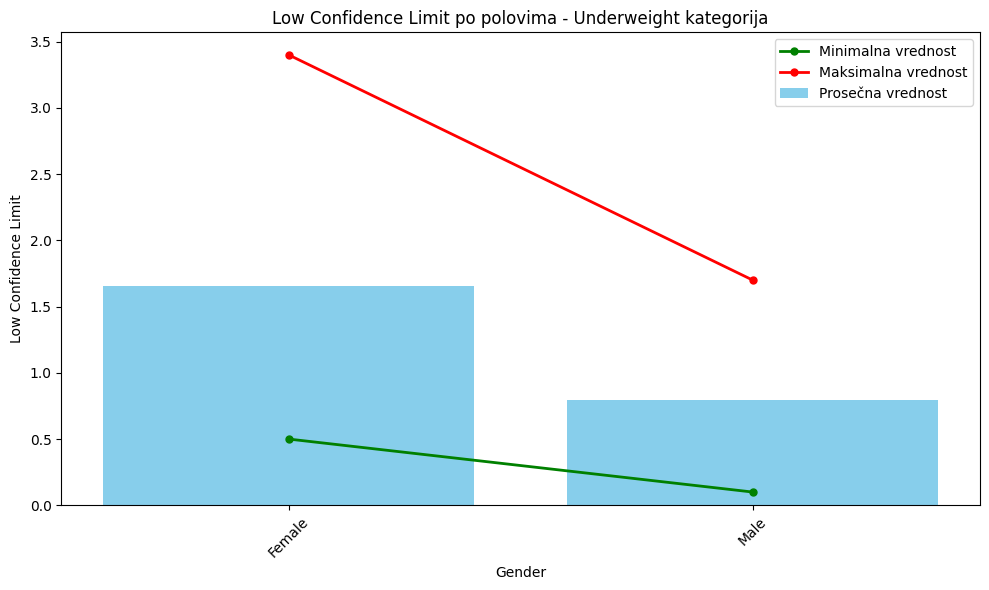

In [21]:
# Odabir željene vrednosti iz Break_Out_Category
desired_category = 'Gender'
filtered_data = underweight_data[underweight_data['Break_Out_Category'] == desired_category]

# Grupisanje podataka i računanje prosečnih, minimalnih i maksimalnih Low_Confidence_Limit
confidence_limit_stats = filtered_data.groupby('Break_Out')['Confidence_limit_Low'].agg(['mean', 'min', 'max'])

# Prikaz rezultata
print("Prosečni, minimalni i maksimalni Low Confidence Limit za različite rase 'Underweight' kategorije:")
print(confidence_limit_stats)

# Kreiranje grafa
plt.figure(figsize=(10, 6))

# Bar graf za prosečne vrednosti
plt.bar(confidence_limit_stats.index, confidence_limit_stats['mean'], color='skyblue', label='Prosečna vrednost')

# Dodavanje linija za minimalne i maksimalne vrednosti
plt.plot(confidence_limit_stats.index, confidence_limit_stats['min'], color='green', marker='o', linestyle='-', linewidth=2, markersize=5, label='Minimalna vrednost')
plt.plot(confidence_limit_stats.index, confidence_limit_stats['max'], color='red', marker='o', linestyle='-', linewidth=2, markersize=5, label='Maksimalna vrednost')

# Dodavanje oznaka i legende
plt.xlabel('Gender')
plt.ylabel('Low Confidence Limit')
plt.title('Low Confidence Limit po polovima - Underweight kategorija')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Prikazivanje grafa
plt.show()

Prosečni, minimalni i maksimalni Low Confidence Limit po Race/Ethnicity kategoriji 'Normalweight' kategorije:
                mean   min   max
Break_Out                       
Female     35.010273  15.3  48.2
Male       25.377987  15.7  41.9


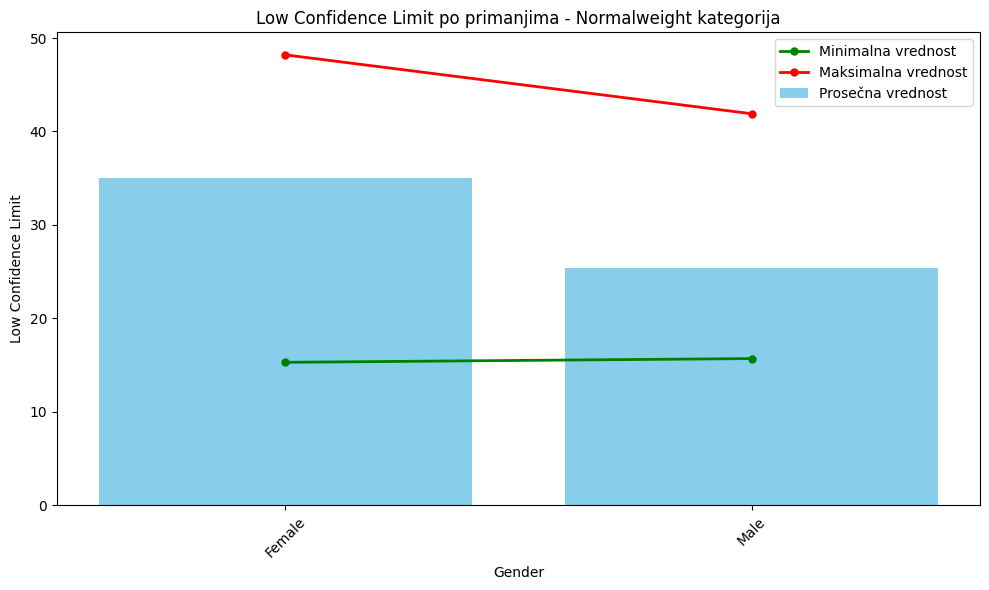

In [22]:
# Odabir željene vrednosti iz Break_Out_Category
desired_category = 'Gender'
filtered_data = normalweight_data[normalweight_data['Break_Out_Category'] == desired_category]

# Grupisanje podataka i računanje prosečnih, minimalnih i maksimalnih Low_Confidence_Limit
confidence_limit_stats = filtered_data.groupby('Break_Out')['Confidence_limit_Low'].agg(['mean', 'min', 'max'])

# Prikaz rezultata
print("Prosečni, minimalni i maksimalni Low Confidence Limit po Race/Ethnicity kategoriji 'Normalweight' kategorije:")
print(confidence_limit_stats)

# Kreiranje grafa
plt.figure(figsize=(10, 6))

# Bar graf za prosečne vrednosti
plt.bar(confidence_limit_stats.index, confidence_limit_stats['mean'], color='skyblue', label='Prosečna vrednost')

# Dodavanje linija za minimalne i maksimalne vrednosti
plt.plot(confidence_limit_stats.index, confidence_limit_stats['min'], color='green', marker='o', linestyle='-', linewidth=2, markersize=5, label='Minimalna vrednost')
plt.plot(confidence_limit_stats.index, confidence_limit_stats['max'], color='red', marker='o', linestyle='-', linewidth=2, markersize=5, label='Maksimalna vrednost')

# Dodavanje oznaka i legende
plt.xlabel('Gender')
plt.ylabel('Low Confidence Limit')
plt.title('Low Confidence Limit po polovima - Normalweight kategorija')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

Prosečni, minimalni i maksimalni Low Confidence Limit po rasama 'Obese' i 'Overweight' kategorije:

                     Response Break_Out       mean   min   max
0     Obese (BMI 30.0 - 99.8)    Female  28.571908  16.9  42.5
1     Obese (BMI 30.0 - 99.8)      Male  28.220335  15.1  38.9
2  Overweight (BMI 25.0-29.9)    Female  27.300000  19.6  34.1
3  Overweight (BMI 25.0-29.9)      Male  37.931866  26.5  43.1



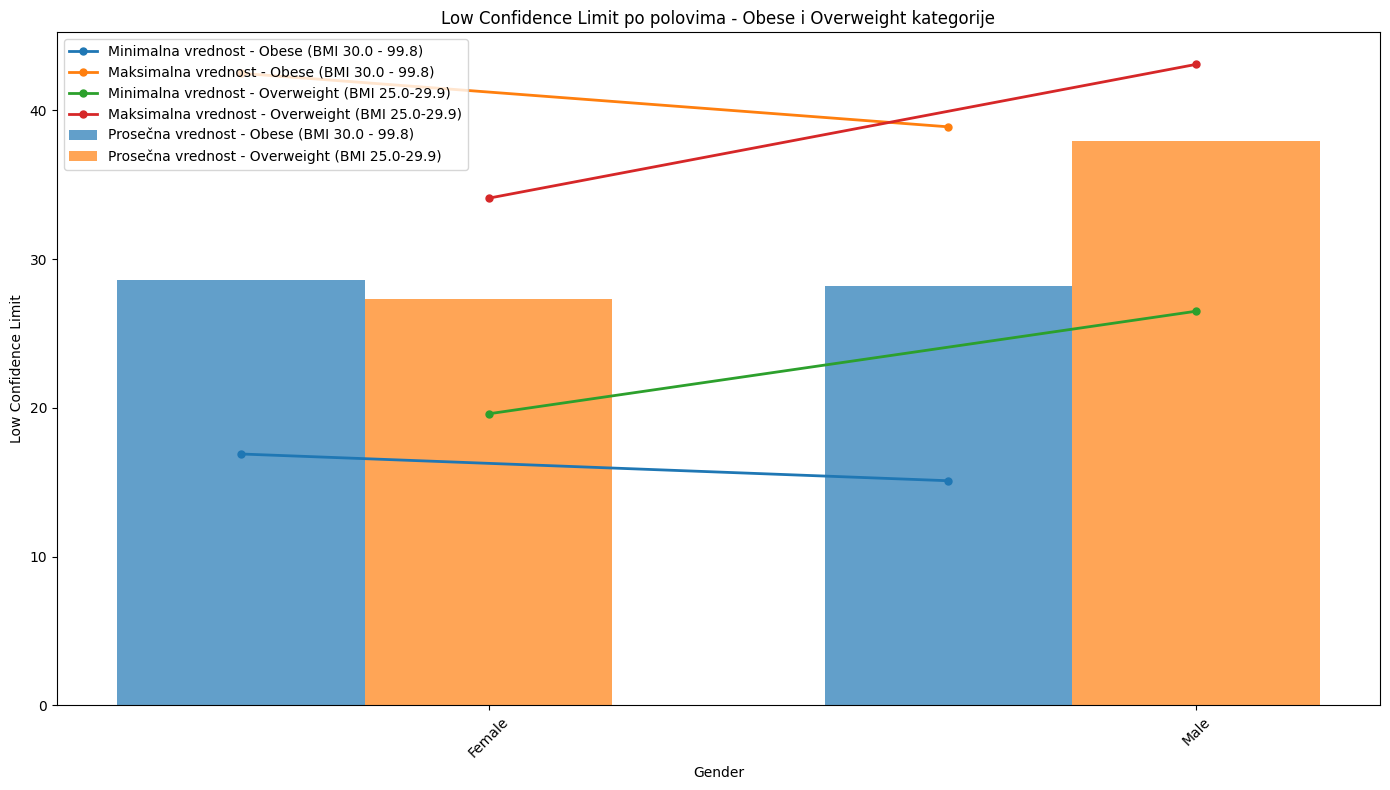

In [23]:
desired_category = 'Gender'
filtered_data = overweight_obese_data[overweight_obese_data['Break_Out_Category'] == desired_category]

# Grupisanje podataka i računanje prosečnih, minimalnih i maksimalnih Low_Confidence_Limit
confidence_limit_stats = filtered_data.groupby(['Response', 'Break_Out'])['Confidence_limit_Low'].agg(['mean', 'min', 'max']).reset_index()

# Prikaz rezultata
print("Prosečni, minimalni i maksimalni Low Confidence Limit po rasama 'Obese' i 'Overweight' kategorije:")
print("")
print(confidence_limit_stats)
print("")

# Kreiranje grafa
fig, ax = plt.subplots(figsize=(14, 8))

bar_width = 0.35
age_groups = confidence_limit_stats['Break_Out'].unique()
index = range(len(age_groups))

# Kreiranje bar grafa za prosečne vrednosti sa različitim bojama
for i, response in enumerate(confidence_limit_stats['Response'].unique()):
    response_data = confidence_limit_stats[confidence_limit_stats['Response'] == response]
    bar_positions = [p + bar_width*i for p in index]
    ax.bar(bar_positions, response_data['mean'], width=bar_width, label=f'Prosečna vrednost - {response}', alpha=0.7)

# Dodavanje linija za minimalne i maksimalne vrednosti
for response in confidence_limit_stats['Response'].unique():
    response_data = confidence_limit_stats[confidence_limit_stats['Response'] == response]
    bar_positions = [p + bar_width*list(confidence_limit_stats['Response'].unique()).index(response) for p in index]
    ax.plot(bar_positions, response_data['min'], marker='o', linestyle='-', linewidth=2, markersize=5, label=f'Minimalna vrednost - {response}')
    ax.plot(bar_positions, response_data['max'], marker='o', linestyle='-', linewidth=2, markersize=5, label=f'Maksimalna vrednost - {response}')

# Dodavanje oznaka i legende
ax.set_xlabel('Gender')
ax.set_ylabel('Low Confidence Limit')
ax.set_title('Low Confidence Limit po polovima - Obese i Overweight kategorije')
ax.set_xticks([p + bar_width for p in index])
ax.set_xticklabels(age_groups, rotation=45)
ax.legend()
plt.tight_layout()

# Prikazivanje grafa
plt.show()

Broj osoba u različitim kategorijama prihoda koji su prekomerne težine ili gojazni:

                      Response          Break_Out  counts
0      Obese (BMI 30.0 - 99.8)  $100,000-$199,999     107
1      Obese (BMI 30.0 - 99.8)    $15,000-$24,999     477
2      Obese (BMI 30.0 - 99.8)          $200,000+     107
3      Obese (BMI 30.0 - 99.8)    $25,000-$34,999     477
4      Obese (BMI 30.0 - 99.8)    $35,000-$49,999     477
5      Obese (BMI 30.0 - 99.8)           $50,000+     370
6      Obese (BMI 30.0 - 99.8)    $50,000-$99,999     107
7      Obese (BMI 30.0 - 99.8)  Less than $15,000     477
8   Overweight (BMI 25.0-29.9)  $100,000-$199,999     107
9   Overweight (BMI 25.0-29.9)    $15,000-$24,999     477
10  Overweight (BMI 25.0-29.9)          $200,000+     107
11  Overweight (BMI 25.0-29.9)    $25,000-$34,999     477
12  Overweight (BMI 25.0-29.9)    $35,000-$49,999     477
13  Overweight (BMI 25.0-29.9)           $50,000+     370
14  Overweight (BMI 25.0-29.9)    $50,000-$99

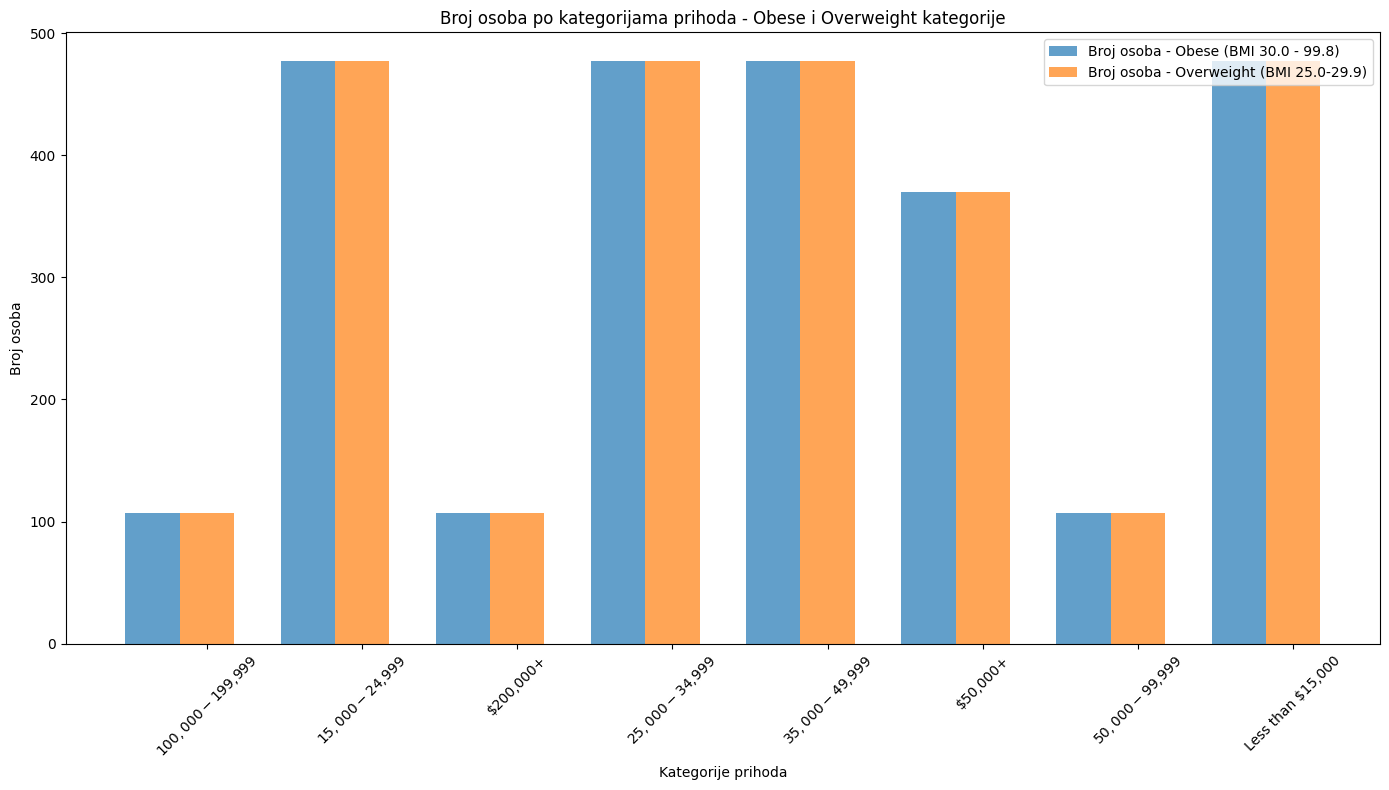

In [35]:
# Filtriranje podataka za "Obese" i "Overweight" Response
overweight_obese_data = data[data['Response'].isin(['Obese (BMI 30.0 - 99.8)', 'Overweight (BMI 25.0-29.9)'])]

# Odabir željene vrednosti iz Break_Out_Category
desired_category = 'Household Income'
filtered_data = overweight_obese_data[overweight_obese_data['Break_Out_Category'] == desired_category]

# Grupisanje podataka i brojanje pojavljivanja svake kombinacije Response i Break_Out (Income)
count_stats = filtered_data.groupby(['Response', 'Break_Out']).size().reset_index(name='counts')

# Prikaz rezultata
print("Broj osoba u različitim kategorijama prihoda koji su prekomerne težine ili gojazni:")
print("")
print(count_stats)
print("")

# Kreiranje grafa
fig, ax = plt.subplots(figsize=(14, 8))

bar_width = 0.35
income_groups = count_stats['Break_Out'].unique()
index = range(len(income_groups))

# Kreiranje bar grafa za broj osoba sa različitim bojama za svaku kategoriju Response
for i, response in enumerate(count_stats['Response'].unique()):
    response_data = count_stats[count_stats['Response'] == response]
    bar_positions = [p + bar_width*i for p in index]
    ax.bar(bar_positions, response_data['counts'], width=bar_width, label=f'Broj osoba - {response}', alpha=0.7)

# Dodavanje oznaka i legende
ax.set_xlabel('Kategorije prihoda')
ax.set_ylabel('Broj osoba')
ax.set_title('Broj osoba po kategorijama prihoda - Obese i Overweight kategorije')
ax.set_xticks([p + bar_width for p in index])
ax.set_xticklabels(income_groups, rotation=45)
ax.legend()
plt.tight_layout()

# Prikazivanje grafa
plt.show()

Broj osoba u različitim kategorijama prihoda koji su prekomerne težine ili gojazni:

                      Response          Break_Out  counts
0  Underweight (BMI 12.0-18.4)  $100,000-$199,999     107
1  Underweight (BMI 12.0-18.4)    $15,000-$24,999     477
2  Underweight (BMI 12.0-18.4)          $200,000+     107
3  Underweight (BMI 12.0-18.4)    $25,000-$34,999     477
4  Underweight (BMI 12.0-18.4)    $35,000-$49,999     477
5  Underweight (BMI 12.0-18.4)           $50,000+     370
6  Underweight (BMI 12.0-18.4)    $50,000-$99,999     107
7  Underweight (BMI 12.0-18.4)  Less than $15,000     477



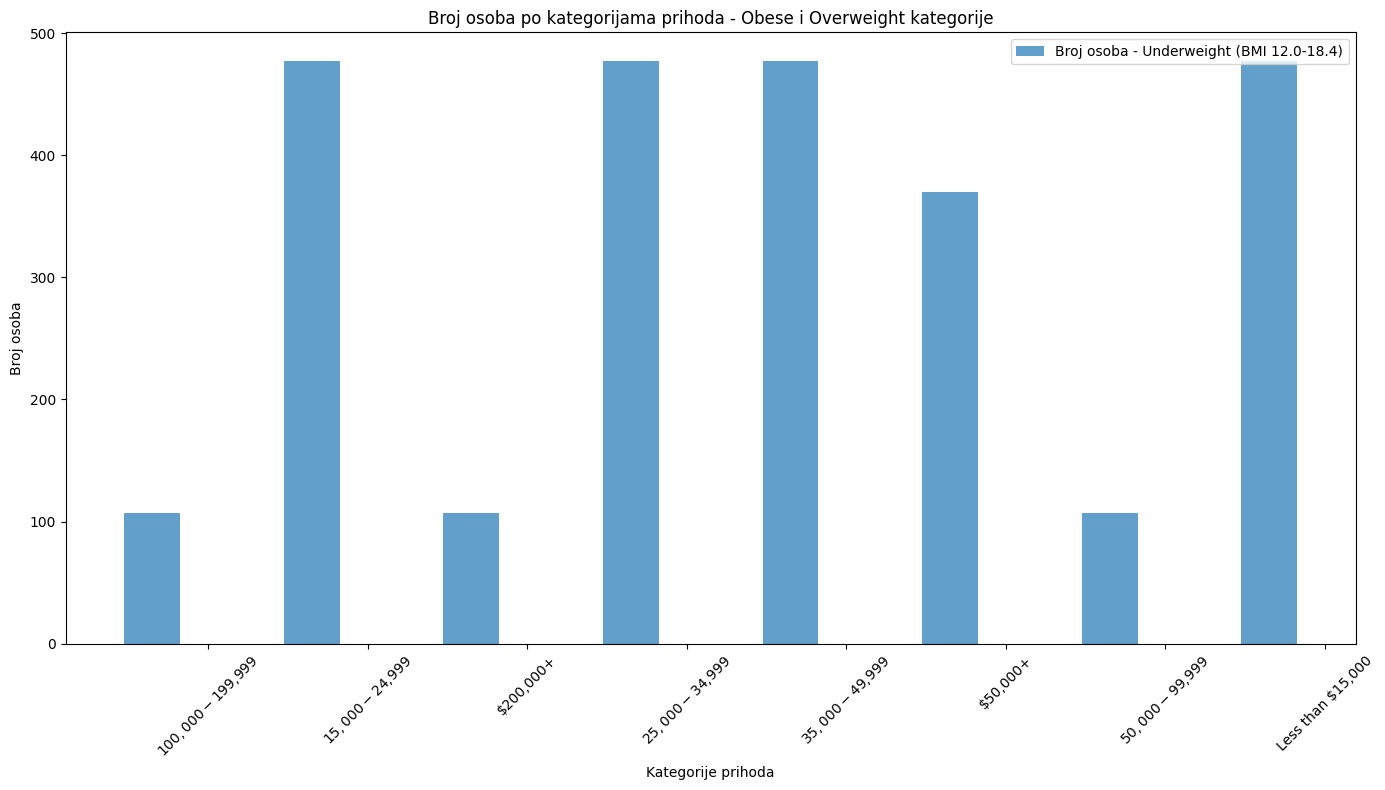

In [39]:
# Odabir željene vrednosti iz Break_Out_Category
desired_category = 'Household Income'
filtered_data = underweight_data[underweight_data['Break_Out_Category'] == desired_category]

# Grupisanje podataka i brojanje pojavljivanja svake kombinacije Response i Break_Out (Income)
count_stats = filtered_data.groupby(['Response', 'Break_Out']).size().reset_index(name='counts')

# Prikaz rezultata
print("Broj osoba u različitim kategorijama prihoda koji su prekomerne težine ili gojazni:")
print("")
print(count_stats)
print("")

# Kreiranje grafa
fig, ax = plt.subplots(figsize=(14, 8))

bar_width = 0.35
income_groups = count_stats['Break_Out'].unique()
index = range(len(income_groups))

# Kreiranje bar grafa za broj osoba sa različitim bojama za svaku kategoriju Response
for i, response in enumerate(count_stats['Response'].unique()):
    response_data = count_stats[count_stats['Response'] == response]
    bar_positions = [p + bar_width*i for p in index]
    ax.bar(bar_positions, response_data['counts'], width=bar_width, label=f'Broj osoba - {response}', alpha=0.7)

# Dodavanje oznaka i legende
ax.set_xlabel('Kategorije prihoda')
ax.set_ylabel('Broj osoba')
ax.set_title('Broj osoba po kategorijama prihoda - Obese i Overweight kategorije')
ax.set_xticks([p + bar_width for p in index])
ax.set_xticklabels(income_groups, rotation=45)
ax.legend()
plt.tight_layout()

# Prikazivanje grafa
plt.show()

Number of individuals in different income categories who are overweight or obese:

                      Response          Break_Out  counts
0      Obese (BMI 30.0 - 99.8)  $100,000-$199,999     107
1      Obese (BMI 30.0 - 99.8)    $15,000-$24,999     477
2      Obese (BMI 30.0 - 99.8)          $200,000+     107
3      Obese (BMI 30.0 - 99.8)    $25,000-$34,999     477
4      Obese (BMI 30.0 - 99.8)    $35,000-$49,999     477
5      Obese (BMI 30.0 - 99.8)           $50,000+     370
6      Obese (BMI 30.0 - 99.8)    $50,000-$99,999     107
7      Obese (BMI 30.0 - 99.8)  Less than $15,000     477
8   Overweight (BMI 25.0-29.9)  $100,000-$199,999     107
9   Overweight (BMI 25.0-29.9)    $15,000-$24,999     477
10  Overweight (BMI 25.0-29.9)          $200,000+     107
11  Overweight (BMI 25.0-29.9)    $25,000-$34,999     477
12  Overweight (BMI 25.0-29.9)    $35,000-$49,999     477
13  Overweight (BMI 25.0-29.9)           $50,000+     370
14  Overweight (BMI 25.0-29.9)    $50,000-$99,9

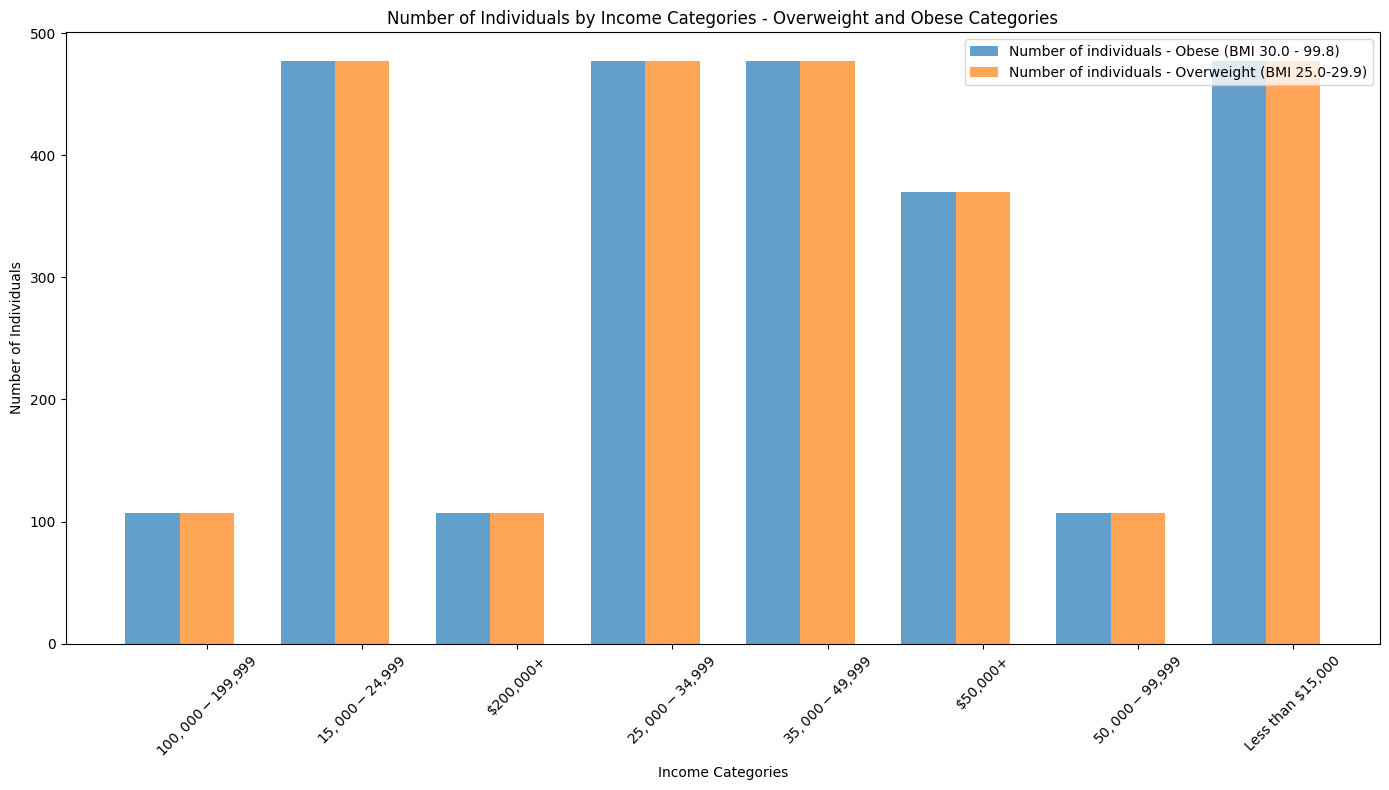

In [40]:
# Select the data for 'Household Income' category
desired_category = 'Household Income'
filtered_data = overweight_obese_data[overweight_obese_data['Break_Out_Category'] == desired_category]

# Group the data and count occurrences of each combination of Response and Break_Out (Income)
count_stats = filtered_data.groupby(['Response', 'Break_Out']).size().reset_index(name='counts')

# Display the results
print("Number of individuals in different income categories who are overweight or obese:")
print("")
print(count_stats)
print("")

# Plotting the data
fig, ax = plt.subplots(figsize=(14, 8))

bar_width = 0.35
income_groups = count_stats['Break_Out'].unique()
index = range(len(income_groups))

# Create bar plot for each response category
for i, response in enumerate(count_stats['Response'].unique()):
    response_data = count_stats[count_stats['Response'] == response]
    bar_positions = [p + bar_width*i for p in index]
    ax.bar(bar_positions, response_data['counts'], width=bar_width, label=f'Number of individuals - {response}', alpha=0.7)

# Adding labels and legend
ax.set_xlabel('Income Categories')
ax.set_ylabel('Number of Individuals')
ax.set_title('Number of Individuals by Income Categories - Overweight and Obese Categories')
ax.set_xticks([p + bar_width for p in index])
ax.set_xticklabels(income_groups, rotation=45)
ax.legend()
plt.tight_layout()

# Display the plot
plt.show()